## __Cookies project__

Special Topics in Deep Learning and Artificial Intelligence 

# Exploratory data analysis 

### Datasets

- dunking data - washburn equation 
    1. gamma: the tea surface tension, in N m−1.
    2. phi: the contact angle between the biscuit and the tea surface, in rad.
    3. eta: the tea dynamic viscosity, in Pa s
    4. L: the distance up the biscuit that the tea was visible, in m.
    5. t: the time after initial dunking that the measurement was made, in s.
    6. biscuit: the type of biscuit that was dunked, which is Rich Tea, Hobnob or Digestive

* microscopy data  - pore radius 
    1. gamma: the tea surface tension, in N m−1.
    2. phi: the contact angle between the biscuit and the tea surface, in rad.
    3. eta: the tea dynamic viscosity, in Pa s
    4. L: the distance up the biscuit that the tea was visible, in m.
    5. t: the time after initial dunking that the measurement was made, in s.
    6. r: the radius of the pore, in m
    
    
- time resolved - capillary flow analysis 
    1. t: the time elapsed in the measurement, in s, the dependent variable.
    2. L: the length the tea has soaked up the biscuit, the independent variable, in m.
    3. dL: an estimate of the uncertainty in length, also in m

    Constants:
    
    * the tea surface tension at 6.78 ×10−2 N m−1.
    * the contact angle was 1.45 rad.
    * the tea dynamic viscosity was 9.93 ×10−4 Pa s



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data 

dunking_data = pd.read_csv('data/dunking-data.csv')
microscopy_data = pd.read_csv('data/microscopy-data.csv')
tr1_data = pd.read_csv('data/tr-1.csv')
tr2_data = pd.read_csv('data/tr-2.csv')
tr3_data = pd.read_csv('data/tr-3.csv')

# Constants
tea_surface_tension = 6.78e-2  # N m−1
contact_angle = 1.45  # rad
tea_dynamic_viscosity = 9.93e-4  # Pa s

tr1_data['eta'] = tea_dynamic_viscosity
tr1_data['gamma'] = tea_surface_tension
tr1_data['phi'] = contact_angle

tr2_data['eta'] = tea_dynamic_viscosity
tr2_data['gamma'] = tea_surface_tension
tr2_data['phi'] = contact_angle

tr3_data['eta'] = tea_dynamic_viscosity
tr3_data['gamma'] = tea_surface_tension
tr3_data['phi'] = contact_angle

In [2]:
## Microscopy data is a subset of Dunking data
# Merge the two dataframes on the common columns
microscopy_labeled = pd.merge(dunking_data, microscopy_data, on=['L', 'eta', 'phi', 't', 'gamma'])

microscopy_labeled 

# Remove the common columns from dunking_data

dunking_data = dunking_data[~dunking_data.isin(microscopy_labeled)].dropna()



biscuit
Hobnob       942
Digestive    937
Rich Tea     935
Name: count, dtype: int64


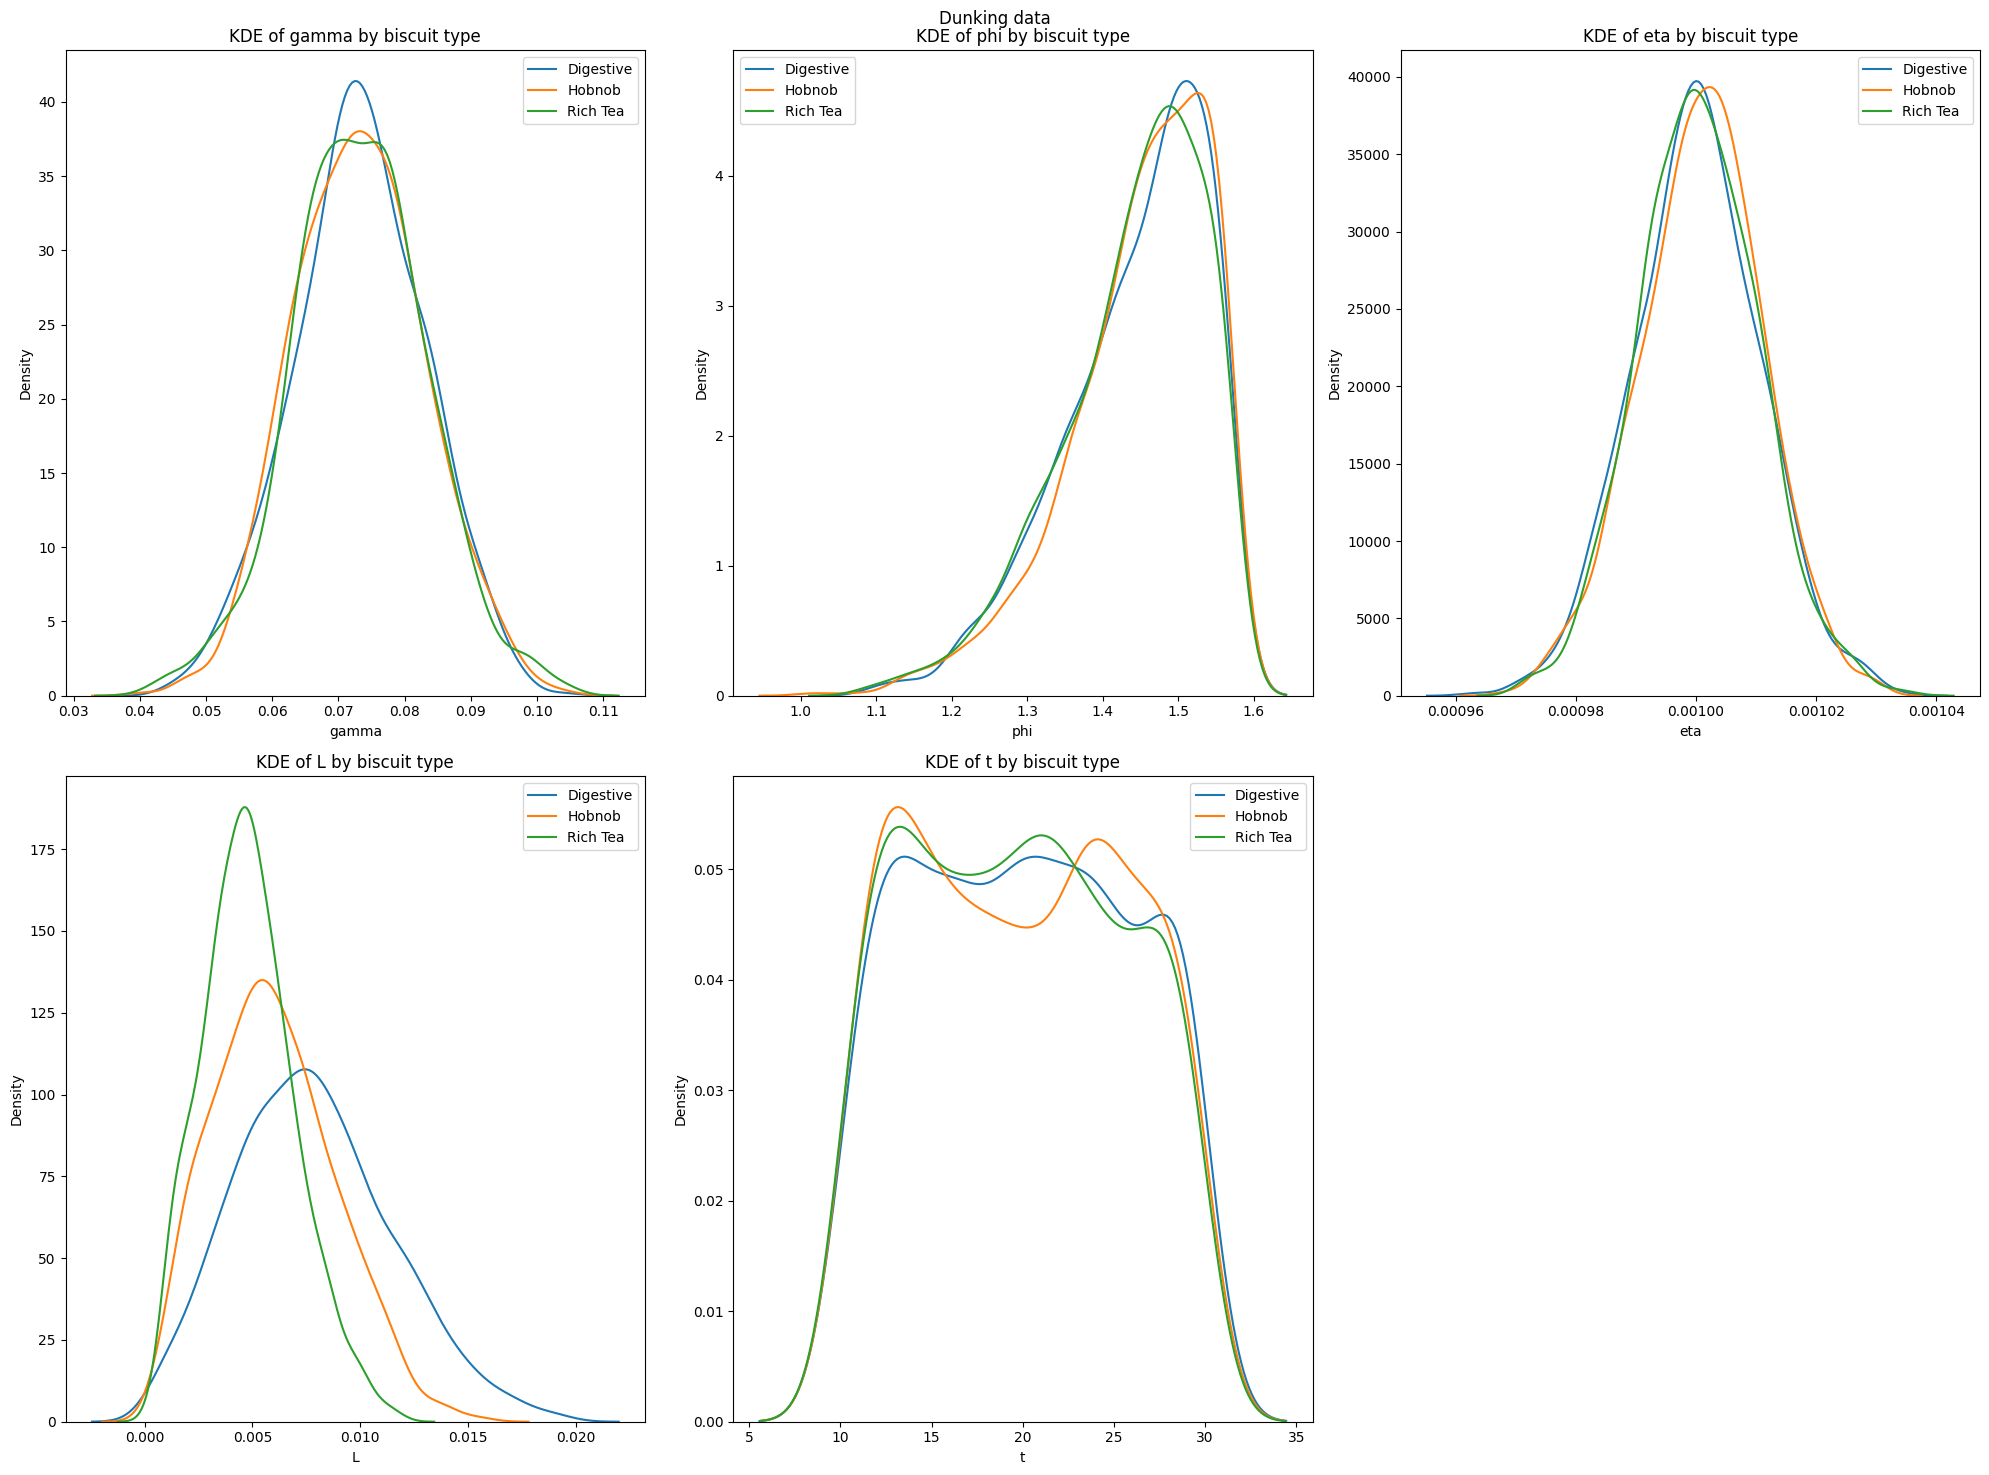

In [3]:
# Check the number of biscuits in each type from dunking_data
biscuit_counts = dunking_data['biscuit'].value_counts()
print(biscuit_counts)

# Get the list of numerical columns
num_cols = dunking_data.select_dtypes(include=['float64', 'int64']).columns

# Create a 3x2 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array to make indexing easier
axs = axs.flatten()

# Plot KDE for each numerical column
for i, col in enumerate(num_cols[:5]):
    for biscuit_type in dunking_data['biscuit'].unique():
        sns.kdeplot(dunking_data[dunking_data['biscuit'] == biscuit_type][col], ax=axs[i], label=biscuit_type)
    axs[i].set_title(f'KDE of {col} by biscuit type')
    axs[i].legend()

# Remove the last (empty) subplot
fig.delaxes(axs[-1])

plt.suptitle("Dunking data")

plt.tight_layout()
plt.show()

biscuit
Rich Tea     169
Digestive    168
Hobnob       163
Name: count, dtype: int64


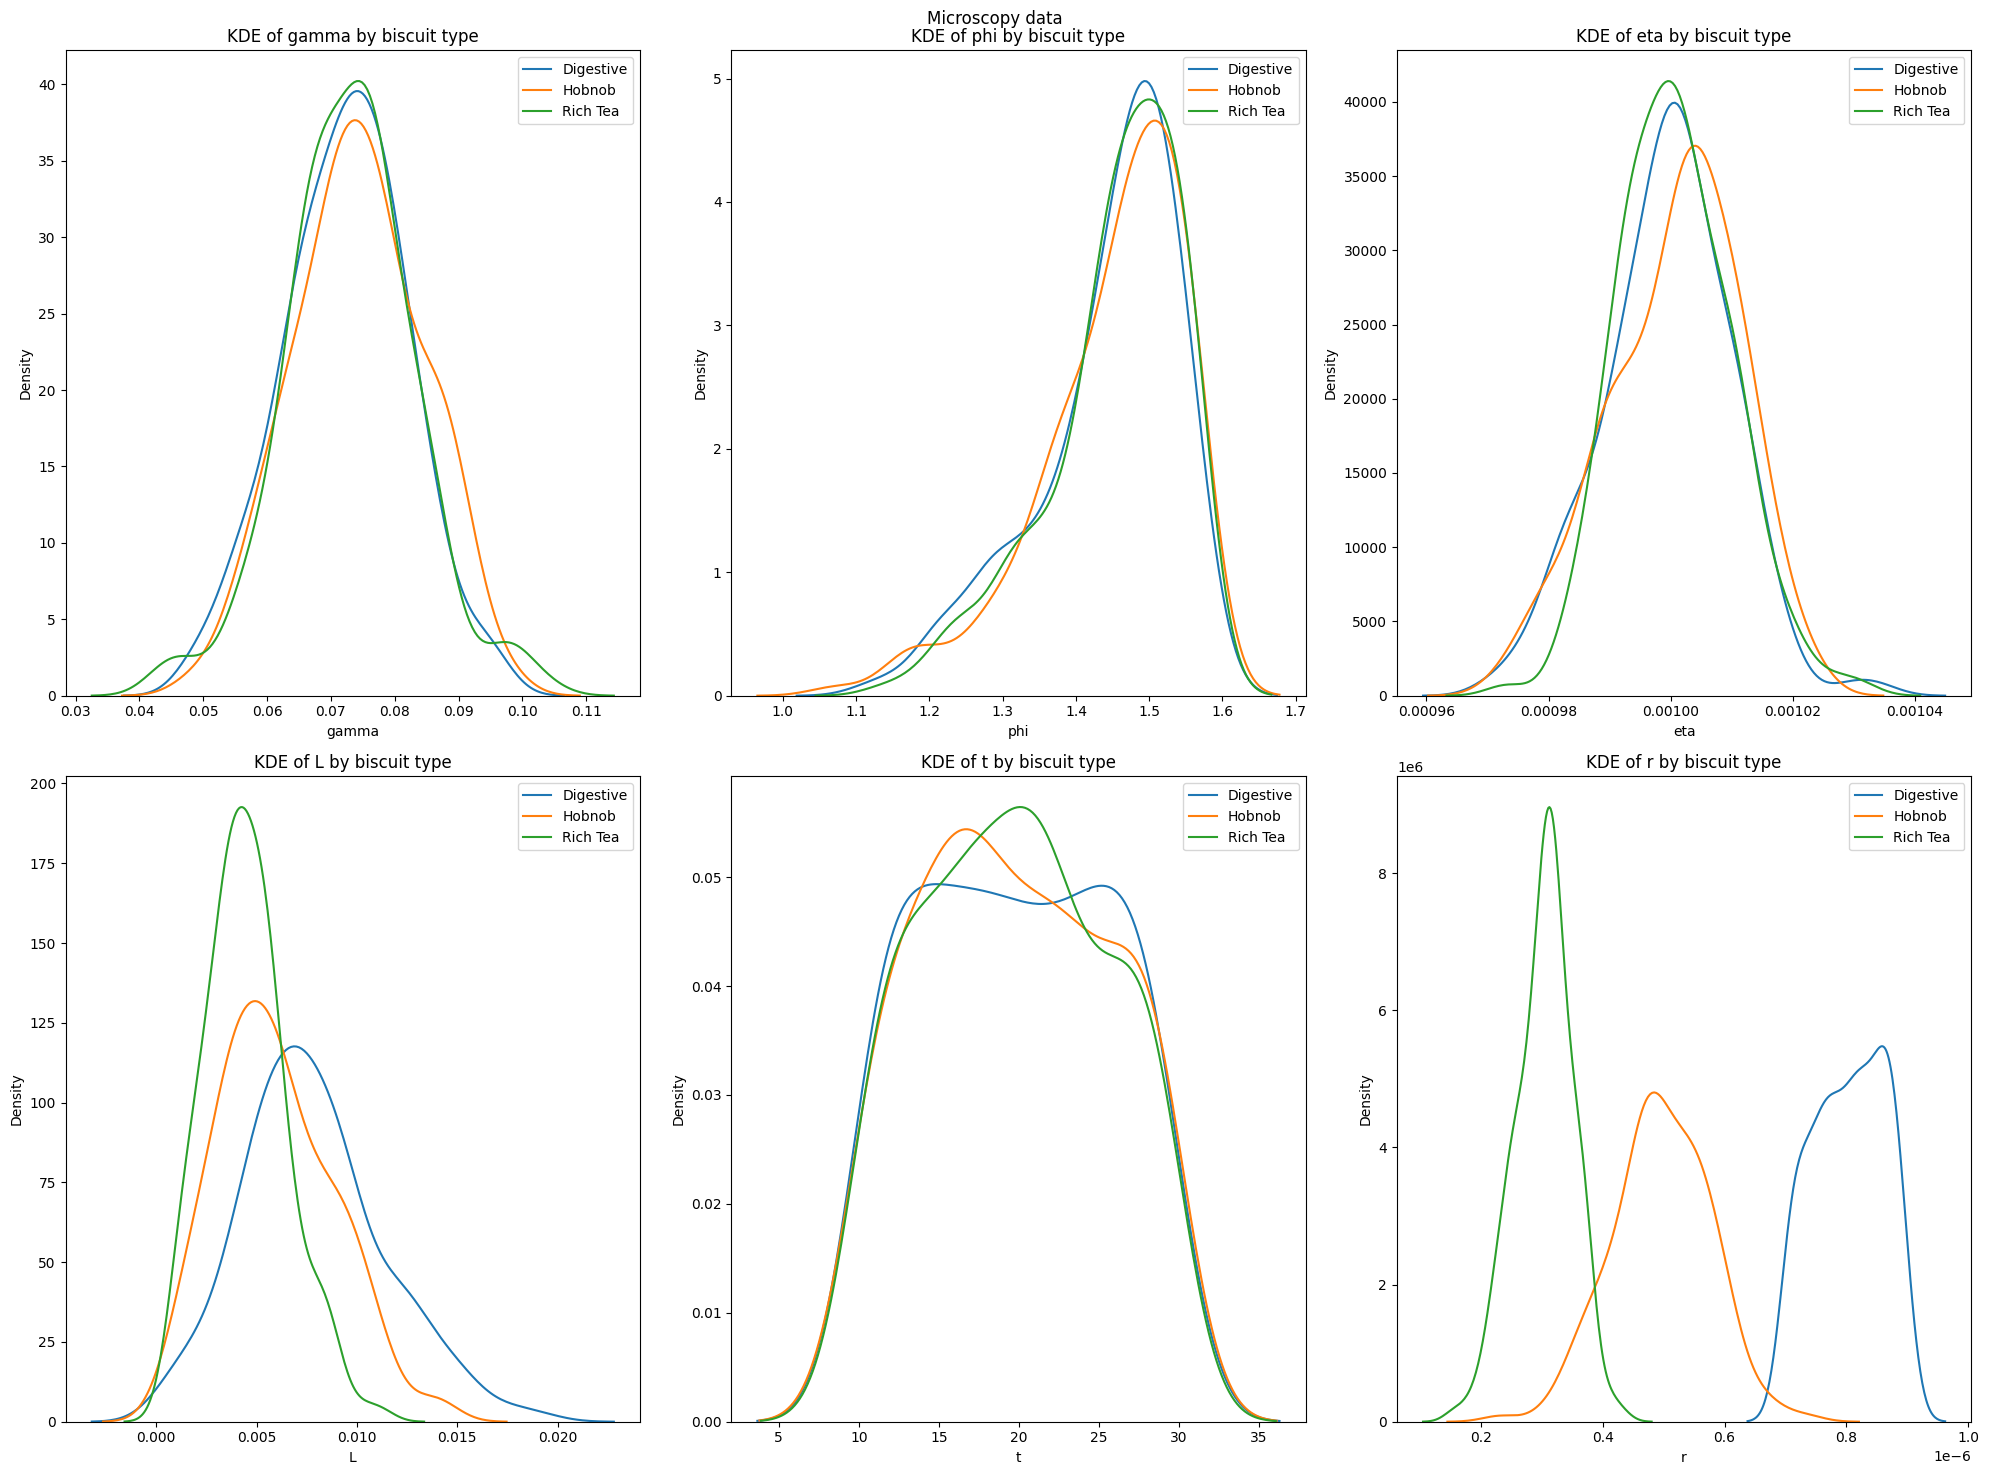

In [4]:
# Check the number of biscuits in each type
biscuit_counts = microscopy_labeled['biscuit'].value_counts()
print(biscuit_counts)

# Get the list of numerical columns
num_cols = microscopy_labeled.select_dtypes(include=['float64', 'int64']).columns

# Create a 3x2 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array to make indexing easier
axs = axs.flatten()

# Plot KDE for each numerical column
for i, col in enumerate(num_cols):
    for biscuit_type in microscopy_labeled['biscuit'].unique():
        sns.kdeplot(microscopy_labeled[microscopy_labeled['biscuit'] == biscuit_type][col], ax=axs[i], label=biscuit_type)
    axs[i].set_title(f'KDE of {col} by biscuit type')
    axs[i].legend()

plt.suptitle("Microscopy data")
plt.tight_layout()
plt.show()

Pore radius seems to be the most differentiating factor among the biscuit types, alongside the length of the tea soaking up the biscuit. Moreover there is a positive correlation between pore radius and the length. The pore radius will be investigated further.

In [5]:
# Prune outliers on boxplots of radius by biscuit type

def remove_outliers(group):
    Q1 = group['r'].quantile(0.25)
    Q3 = group['r'].quantile(0.75)
    IQR = Q3 - Q1
    mask = (group['r'] >= (Q1 - 1.5 * IQR)) & (group['r'] <= (Q3 + 1.5 * IQR))
    return group[mask]

microscopy_pruned = microscopy_labeled.groupby('biscuit')[['L', 'eta', 'phi', 't', 'gamma','r', 'biscuit']].apply(remove_outliers)
microscopy_pruned.reset_index(drop=True, inplace=True)
microscopy_pruned

,L,eta,phi,t,gamma,r,biscuit
0,0.005894,0.001012,1.476758,11.852589,0.080946,7.797961e-07,Digestive
1,0.009249,0.000984,1.477141,24.793669,0.087408,8.189772e-07,Digestive
2,0.007034,0.000993,1.414721,11.121606,0.070943,7.930241e-07,Digestive
3,0.006762,0.000996,1.377487,10.031548,0.062258,7.693137e-07,Digestive
4,0.006188,0.001015,1.500014,16.631355,0.083265,8.343526e-07,Digestive
...,...,...,...,...,...,...,...
489,0.003516,0.000993,1.499299,12.019737,0.077401,3.704851e-07,Rich Tea
490,0.001276,0.000987,1.562215,25.022570,0.046098,3.284792e-07,Rich Tea
491,0.005850,0.001009,1.392407,14.213099,0.076069,3.485692e-07,Rich Tea
492,0.004119,0.001004,1.466961,17.604523,0.060301,3.187500e-07,Rich Tea


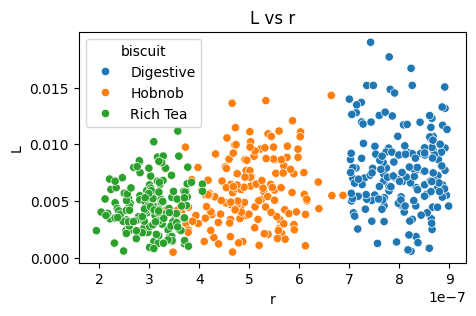

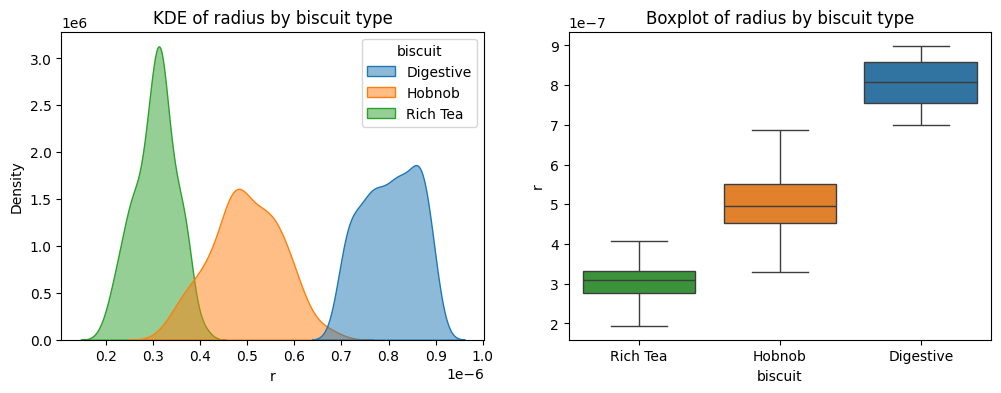

In [6]:
# Plot L vs r by biscuit type

plt.figure(figsize=(5, 3))
sns.scatterplot(data=microscopy_pruned, x='r', y='L', hue='biscuit')
plt.title('L vs r')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# KDE plot of radius by biscuit type
sns.kdeplot(data=microscopy_pruned, x='r', fill=True, levels=5, hue="biscuit", alpha=0.5,ax = axs[0])
axs[0].set_title('KDE of radius by biscuit type')

# Boxplot of radius by biscuit type
order = ["Rich Tea", "Hobnob", "Digestive"]
sns.boxplot(data=microscopy_pruned, x='biscuit', y='r', hue='biscuit',ax=axs[1], order = order)
axs[1].set_title('Boxplot of radius by biscuit type')
plt.show()


There is overlap between Hobnob and Rich Tea, less so with Digestive. The maximum absorbance length is higher for digestive, this is attributed to its larger pore radius. 

The pore radii all seem small for a biscuit, for example, digestive biscuits have clear divets in them. This could be because of the expansion of the biscuit upon contact with tea.

### Can pore radius be used to determine the biscuit type?

Trying both unsupervised and supervised classification to determine the biscuit type from available data

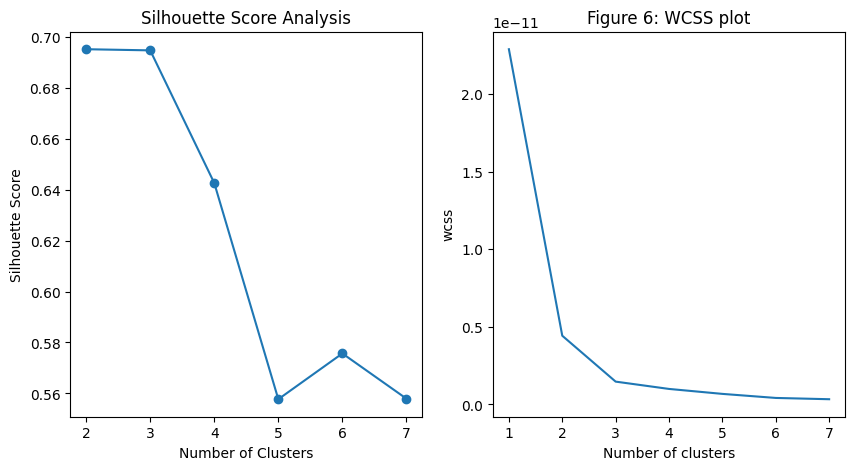

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

# Determining the optimal cluster number 
X = microscopy_pruned[["r"]]
n_clusters = range(1, 8)

# WCSS analysis
wcss = []
for n in n_clusters:
    kmeans = KMeans(n_clusters = n, init = 'k-means++', n_init="auto", random_state = 10)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

n_clusters = range(2,8)

# Silhouette analysis 
silhouette_scores = []
for n in n_clusters:
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=n, random_state=10)
    kmeans.fit(X)
    
    # Calculate the silhouette score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

fig, ax = plt.subplots(1,2,figsize=(10,5))

# Plot the silhouette scores
ax[0].plot(n_clusters, silhouette_scores, marker='o')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Silhouette Score')
ax[0].set_title('Silhouette Score Analysis')


# Plotting wcss     
ax[1].set_title("Figure 6: WCSS plot")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("wcss")
x=np.arange(1,len(wcss)+1,1)
plt.plot(x, wcss)
plt.xticks(x)
plt.show()

The Silhouette and WCSS analysis suggest that while unsupervised K-means identifies 3 groups within the pore radii, this could also be interpreted as 2 groups. This is likely because of the overlap of the pore radii distributions of Hobnob and Rich Tea. 

Three groups will be used in the following K-means analysis as there are three biscuit types, to test K-means classification ability. 

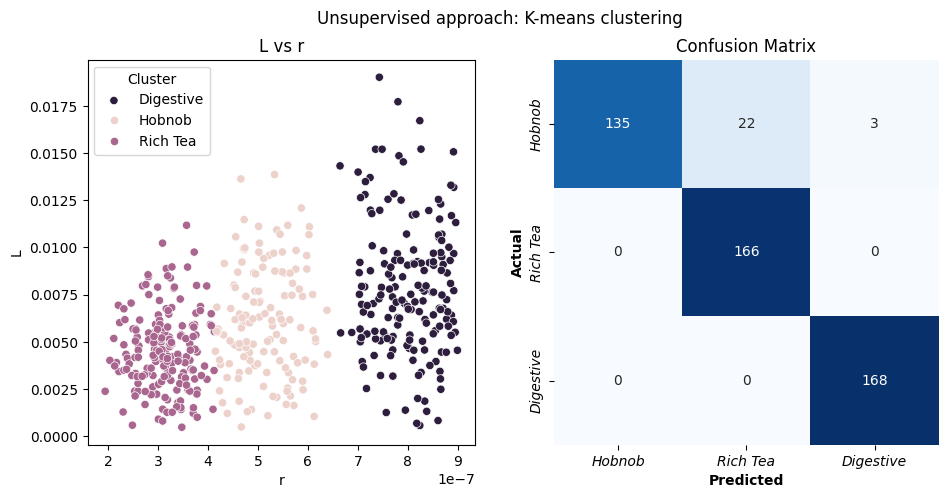


Classification Report:
              precision    recall  f1-score     support
0              1.000000  0.843750  0.915254  160.000000
1              0.882979  1.000000  0.937853  166.000000
2              0.982456  1.000000  0.991150  168.000000
accuracy       0.949393  0.949393  0.949393    0.949393
macro avg      0.955145  0.947917  0.948086  494.000000
weighted avg   0.954711  0.949393  0.948659  494.000000


In [8]:
# Unsupervised K-means clustering of the data using 3 clusters 

# Fit KMeans to the data
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0).fit(X)

# Add the cluster labels to the dataframe
microscopy_pruned['cluster'] = kmeans.labels_

# Create a dictionary to map cluster labels to biscuit types
cluster_to_biscuit = {'Digestive': 2, 'Hobnob': 0, 'Rich Tea': 1}

# Encode the biscuit types according to cluster labels
microscopy_pruned['biscuit_encoded'] = microscopy_pruned['biscuit'].map(cluster_to_biscuit)
dunking_data['biscuit_encoded'] = dunking_data['biscuit'].map(cluster_to_biscuit)

# Generate a confusion matrix
conf_mat = confusion_matrix(microscopy_pruned['biscuit_encoded'], microscopy_pruned['cluster'])

# Generate a classification report 
report_dict = classification_report(microscopy_pruned["biscuit_encoded"], microscopy_pruned["cluster"], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Plot the clusters
fig,axs = plt.subplots(1,2,figsize=(11,5))
sns.scatterplot(data=microscopy_pruned, x='r', y='L', hue='cluster', ax = axs[0])
axs[0].set_title('L vs r')
# Transform labels to biscuit names for better readability
axs[0].legend(title='Cluster', labels=["Digestive", "Hobnob", "Rich Tea"])

# Plot confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax = axs[1])

# Sort the keys of the dictionary
sorted_keys = sorted(cluster_to_biscuit, key=cluster_to_biscuit.get)

# Set x-tick and y-tick labels to biscuit names
axs[1].set_xticklabels(sorted_keys, fontdict={'fontstyle': 'italic'})
axs[1].set_yticklabels(sorted_keys, fontdict={'fontstyle': 'italic'})

# Axis labels and title
plt.xlabel('Predicted', fontdict={"fontweight": "bold"})
plt.ylabel('Actual', fontdict={"fontweight": "bold"})
plt.title('Confusion Matrix')
plt.suptitle("Unsupervised approach: K-means clustering")
plt.show()

print("\nClassification Report:")
print(report_df)


K-means shows varied performance, it has perfect recall for Digestive and Rich Tea, meaning that it is unlikely to mispredict them, however Rich Tea shows a poor precision, meaning that it could predict false positives. Digestive is the most well predicted with high scores across the board, while Hobnob shows good precision and a poor recall. This suggests that Hobnob is most likely to get mispredicted. 

Overall K-means is not a suitable classification algorithm and this could be improved by supervised models.

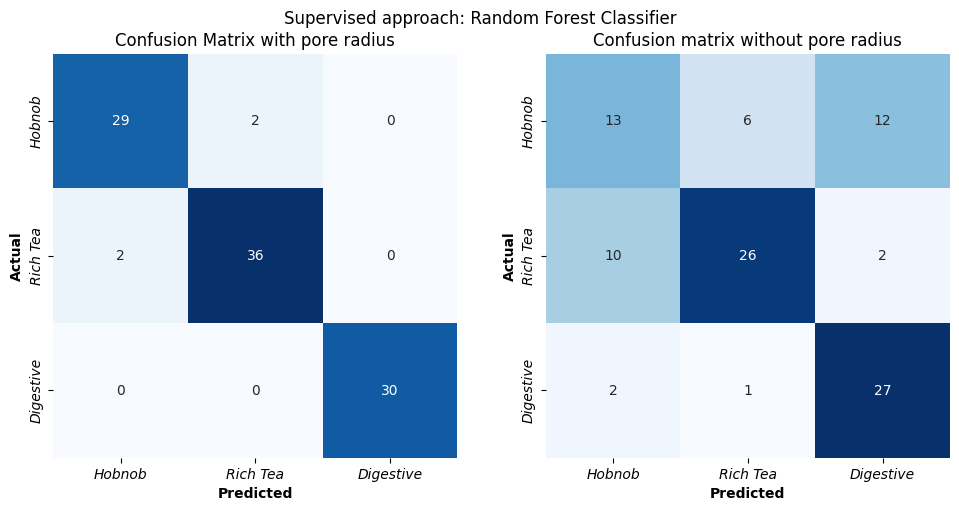

Classification Report (without pore radius):
              precision    recall  f1-score    support
0              0.520000  0.419355  0.464286  31.000000
1              0.787879  0.684211  0.732394  38.000000
2              0.658537  0.900000  0.760563  30.000000
accuracy       0.666667  0.666667  0.666667   0.666667
macro avg      0.655472  0.667855  0.652414  99.000000
weighted avg   0.664803  0.666667  0.656977  99.000000

Classification Report (with pore radius):
              precision    recall  f1-score    support
0              0.935484  0.935484  0.935484  31.000000
1              0.947368  0.947368  0.947368  38.000000
2              1.000000  1.000000  1.000000  30.000000
accuracy       0.959596  0.959596  0.959596   0.959596
macro avg      0.960951  0.960951  0.960951  99.000000
weighted avg   0.959596  0.959596  0.959596  99.000000


In [9]:
# What about a supervised classifier?

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Define variables 
X = microscopy_pruned[['r','L','eta','gamma','phi','t']]
y = microscopy_pruned['biscuit_encoded']

scaler = StandardScaler()
stdX = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=0)

# Fit a Random Forest classifier to the training data
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

# Predict the biscuit type for the test data
y_pred = clf_rf.predict(X_test)

# Generate the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Create a figure with 2 subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix for the first classifier
conf_mat_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax=axs[0])
# Set x-tick and y-tick labels to biscuit names
axs[0].set_xticklabels(sorted_keys, fontdict={'fontstyle': 'italic'})
axs[0].set_yticklabels(sorted_keys, fontdict={'fontstyle': 'italic'})
axs[0].set_xlabel('Predicted',fontdict={'fontweight': 'bold'})
axs[0].set_ylabel('Actual',fontdict={'fontweight': 'bold'})
axs[0].set_title('Confusion Matrix with pore radius')

# How much worse is a classifier without pore radius?

X = microscopy_pruned[['L','eta','gamma','phi','t']]
y = microscopy_pruned['biscuit_encoded']
stdX = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=0)

# Fit a Random Forest classifier to the training data
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict the biscuit type for the test data
y_pred = clf.predict(X_test)

# Generate the classification report
report_dict_rf = classification_report(y_test, y_pred, output_dict=True)

# Plot the confusion matrix for the second classifier
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax=axs[1])
# Set x-tick and y-tick labels to biscuit names
axs[1].set_xticklabels(sorted_keys, fontdict={'fontstyle': 'italic'})
axs[1].set_yticklabels(sorted_keys, fontdict={'fontstyle': 'italic'})
axs[1].set_xlabel('Predicted', fontdict={'fontweight': 'bold'})
axs[1].set_ylabel('Actual', fontdict={'fontweight': 'bold'})
axs[1].set_title('Confusion matrix without pore radius')

plt.suptitle("Supervised approach: Random Forest Classifier")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Output the classification reports
report_df_rf = pd.DataFrame(report_dict_rf).transpose()
report_df = pd.DataFrame(report_dict).transpose()

print("Classification Report (without pore radius):")
print(report_df_rf)
print("\nClassification Report (with pore radius):")
print(report_df)


The inclusion of r in a classification model greatly improves the models ability to determine the biscuit type across all metrics. The model without the pore radius is unreliable, almost completely unable to classify the Hobnobs correctly. A 29 % accuracy increase is seen with the additioon of r. 

### Can we use the Washburn equation to calculate pore radius?

The Washburn equation can be rearranged to give:

$r=\frac{L^{2}2\eta}{t\gamma Cos(\phi)}$

Thereby giving a semi empirical way to calculate the pore radius of biscuits


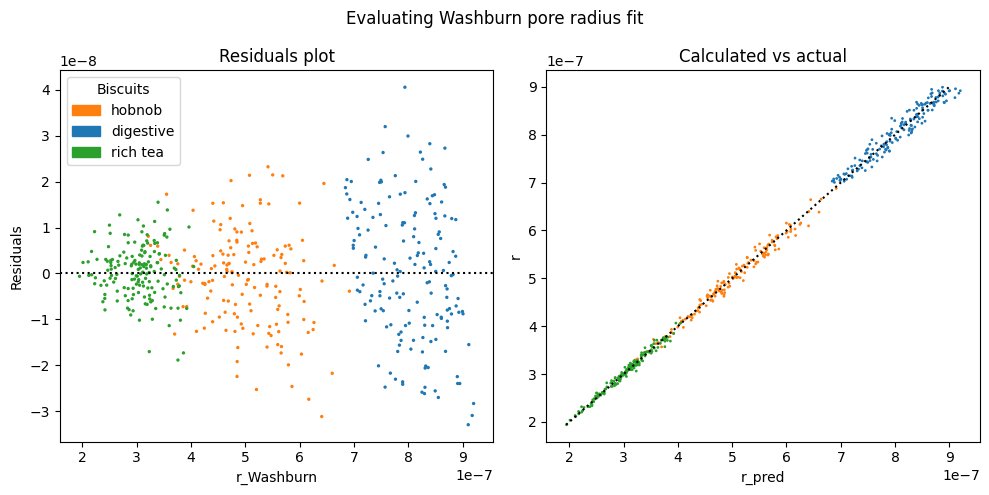

############# Evaluation metrics ###############
model: Washburn
Test size: 494
Correlation coefficient: 0.9986978482539576
Mean Squared Error: 1.210397860071618e-16
R^2 Score: 0.997387911301692
Mean absolute error: 8.293880938206369e-09
Root mean squared error: 1.1001808306235926e-08
Relative absolute error: 0.04351497868222468
Relative root squared error: 0.05110859710760982 

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.034292e-07   2.524111e-10
Hobnob     4.977515e-07  -1.090141e-09
Rich Tea   3.047645e-07   3.080908e-10


In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

## Helper functions for:
# Washburn equation
# Regression analysis 
# Plotting 

def calc_r_washburn(row):
    """
    Calculate r according to Washburn equation
    
    Parameters:
        row - Series representing a row of the dataframe containing L, eta, phi, t, gamma
    """

    L, eta, phi, t, gamma = row["L"], row["eta"], row["phi"], row["t"], row["gamma"]

    r = (2*eta*pow(L,2))/(gamma*t*math.cos(phi))

    return r 

def evaluation_metrics(model, y_true, y_pred):

    """
    Calculate the mean squared error and R^2 score of the model.

    Parameters:

    model: model name
    y_true: the true values
    y_pred: the predicted values

    """

    print("############# Evaluation metrics ###############")
    print("model: "+str(model))
    print("Test size: "+str(y_pred.shape[0]))
    # Correlation coefficient
    corr_coef = np.corrcoef(y_true, y_pred)[0, 1]
    print("Correlation coefficient:", corr_coef)

    # Calculate the mean squared error
    mse = mean_squared_error(y_true, y_pred)
    print("Mean Squared Error:", mse)

    # Calculate the R^2 score
    r2 = r2_score(y_true, y_pred)
    print("R^2 Score:", r2)

    # Mean absolute error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    print("Mean absolute error:", mae)

    # Root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print("Root mean squared error:", rmse)

    # Relative absolute error (RAE)
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))
    print("Relative absolute error:", rae)

    # Root relative squared error (RRSE)
    rrse = np.sqrt(np.sum(np.square(y_true - y_pred)) / np.sum(np.square(y_true - np.mean(y_true))))
    print("Relative root squared error:", rrse, "\n")

    return

# Create a color dictionary for each biscuit type
color_dict = {'hobnob': 'tab:orange', 'digestive': 'tab:blue', 'rich tea': 'tab:green', 0: 'tab:orange', 1: 'tab:green', 2: 'tab:blue'}

def plot_calculated_vs_actual(df, actual_col, pred_col, model_name):
    """ Function for plotting regression analysis graphs

    Parameters:
        df - Dataframe 
        actual_col - column name of the actual values
        pred_col - column name of the predicted values
        model_name - name of the model
        
    """
    # Calculate residuals
    df['residuals_col'] = df[actual_col] - df[pred_col]
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    # Map the biscuit_encoded column to colors using the color_dict
    colors = df['biscuit_encoded'].map(color_dict)

    # Plot the residuals
    axs[0].scatter(df[pred_col], df['residuals_col'], c=colors, s=2)
    axs[0].set_xlabel(pred_col)
    axs[0].axhline(y=0.0, color='black', linestyle='dotted')
    axs[0].set_ylabel('Residuals')
    axs[0].set_title('Residuals plot')

    # Create a legend with only biscuit names
    biscuit_labels = [label for label in color_dict if isinstance(label, str)]
    patches = [Patch(color=color_dict[label], label=label) for label in biscuit_labels]
    axs[0].legend(handles=patches, title='Biscuits')

    # Plot calculated vs actual
    axs[1].scatter(df[pred_col], df[actual_col], c=colors, s=1, alpha=1)
    axs[1].set_xlabel("r_pred")
    axs[1].set_ylabel("r")
    axs[1].set_title("Calculated vs actual")

    # plot x=y
    axs[1].plot([df[actual_col].min(), df[actual_col].max()], [df[actual_col].min(), df[actual_col].max()], color='black', linestyle='dotted')

    plt.suptitle("Evaluating "+str(model_name)+" pore radius fit")    
    plt.tight_layout()
    plt.show()
    return

def evaluate_pipeline(pipe, model_name, X_train, y_train, X_test, y_test, df):
    """ Evaluate a regression pipeline using cross-validation and evaluation metrics

    Parameters:
        pipe - regression pipeline 
        model_name - name of model
        X_* - X values split by train test split
        df - dataframe 
    """
    # Predict the radius for the test data
    y_pred = pipe.predict(X_test)

    # Calculate evaluation metrics
    evaluation_metrics(model_name, y_test, y_pred)

    # Calculate the cross-validated R^2 score
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring='r2')
    print("Cross-validated R^2 scores:", cv_scores)

    # Print average cross-validation score
    print("Average cross-validated R^2 score:", np.mean(cv_scores))

    # Add predictions to the dataframe
    df_test = df.loc[X_test.index]
    df_test["r_pred"] = y_pred

    # Plot calculated vs actual using the plot function
    plot_calculated_vs_actual(df_test, "r", "r_pred", model_name)

    # Calculate average residuals and average r by biscuit
    df_test["residuals"] = df_test["r"] - df_test["r_pred"]
    average_residuals = df_test.groupby("biscuit")["residuals"].mean()
    average_r = df_test.groupby("biscuit")["r"].mean()

    # Combine into a single DataFrame
    average_df = pd.DataFrame({'Avg r': average_r, 'Avg Residuals': average_residuals})
    print(average_df)
    print("")

    # If pipeline is Random Forest, plot feature importance
    if "Random Forest" in model_name:
        importances = pipe.named_steps['random_forest'].feature_importances_
        features = X_train.columns
        indices = np.argsort(importances)

        plt.figure(figsize=(8, 4))
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

    return

# Evaluating the fit of Washburn equation on the microscopy data

microscopy_pruned["r_Washburn"] = microscopy_pruned.apply(calc_r_washburn,axis=1)

# Plot the residuals 
plot_calculated_vs_actual(microscopy_pruned, "r", "r_Washburn", "Washburn")

# Print evaluation metrics 
evaluation_metrics("Washburn", microscopy_pruned["r"], microscopy_pruned["r_Washburn"])

# Calculate average residuals and average r by biscuit
average_residuals = microscopy_pruned.groupby("biscuit")["residuals_col"].mean()
average_r = microscopy_pruned.groupby("biscuit")["r"].mean()

# Combine into a single DataFrame and output 
average_df = pd.DataFrame({'Avg r': average_r, 'Avg Residuals': average_residuals})
print(average_df)


The Washburn equation predicts the pore radius extremely well, although a skew can be seen in the residuals as the pore radius increases, although the average residuals suggest the pore radius for Hobnobs is most frequently incorrectly predicted.

### How accurate is a classifier based on pore radius?

Training and evaluating a classifier on dunking_data, using the Washburn equation to calculate pore radius

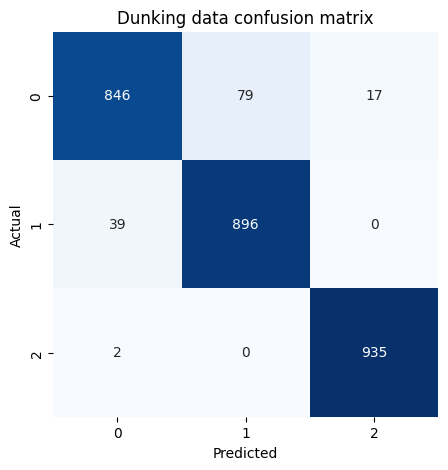

,precision,recall,f1-score,support
0,0.953777,0.898089,0.925096,942.000000
1,0.918974,0.958289,0.938220,935.000000
2,0.982143,0.997866,0.989942,937.000000
accuracy,0.951315,0.951315,0.951315,0.951315
macro avg,0.951631,0.951414,0.951086,2814.000000
weighted avg,0.951658,0.951315,0.951049,2814.000000


In [11]:
from sklearn.model_selection import cross_val_predict

# Calculate r_Washburn values for dunking_data
dunking_data["r_Washburn"] = dunking_data.apply(calc_r_washburn, axis=1)

# Predict biscuit type using the classifier
X = dunking_data[['L','eta','gamma','phi','t','r_Washburn']]
y = dunking_data['biscuit_encoded']

scaler = StandardScaler()
stdX = scaler.fit_transform(X)

# Fit a Random Forest classifier to the data and perform cross-validation
clf = RandomForestClassifier(random_state=0)
y_pred = cross_val_predict(clf, stdX, y, cv=5)

# Generate the classification report
report_dict = classification_report(y, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plot the confusion matrix
conf_mat = confusion_matrix(y, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Dunking data confusion matrix')
plt.show()

report_df

The Random Forest classifier using the Washburn equation to calculate pore radius shows similar performance when compared with that trained on real pore radii from microscopy data. This suggests that pore radius can be calculated accurately enough that the error is not negatively affecting the model. 

### Can regression be used to more accurately compute pore radius?

A clear skew in the residuals of the washburn pore radii can be seen, Machine learning will be used to attempt to reduce the errors seen using the Washburn model alone.

In [18]:
# Analysing different regression models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge as KRR


# Split the data into training and testing sets
X_with_Washburn = microscopy_pruned[['gamma', 'L', 't', 'phi', 'eta', 'r_Washburn']]
X = microscopy_pruned[['gamma', 'L', 't', 'phi', 'eta']]
X_pore_rad = microscopy_pruned[['r_Washburn']]

y = microscopy_pruned['r']

# Create a pipeline for linear regression
linear_pipeline = Pipeline([
    ('linear', LinearRegression())
])

linear_pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

# Create a pipeline for random forest regression
rf_pipeline = Pipeline([
    ('random_forest', RandomForestRegressor())
])

# Create a pipeline for random forest regression
rf_pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor())
])

rf_pipeline_pca = Pipeline([
    ('pca', PCA(n_components=4)),
    ('random_forest', RandomForestRegressor())
])

krr_pipeline_poly = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('kernel', KRR(kernel='poly')),
])

krr_pipeline_linear = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('kernel', KRR(kernel='linear')),
])

# List of pipelines for ease of iteration
pipelines = [linear_pipeline, linear_pipeline_scaled, rf_pipeline, rf_pipeline_scaled, rf_pipeline_pca, krr_pipeline_linear, krr_pipeline_poly]

# Dictionary of pipelines and regressor types for ease of reference
pipe_dict = {0: 'Linear', 1: 'Linear Scaled', 2: 'Random Forest', 3: 'Random Forest Scaled', 4: 'Random Forest PCA', 5: 'Kernel linear', 6: 'Kernel poly'}
# Define the feature sets

feature_sets = [X, X_with_Washburn, X_pore_rad]
feature_set_names = ['Without Washburn', 'With Washburn', 'Just Washburn']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Feature Set', 'Pipeline', 'Train Score', 'Test Score'])

# Fit pipelines on each X, y pair and predict the accuracies
for i, X in enumerate(feature_sets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Exclude certain pipelines if the feature set only contains one feature
    if X.shape[1] == 1:
        fitting_pipelines = [p for p in pipelines if p not in [rf_pipeline_pca]]
    else:
        fitting_pipelines = pipelines

    # Create a dictionary that only includes the fitting pipelines
    fitting_pipe_dict = {i: pipe_dict[pipelines.index(p)] for i, p in enumerate(fitting_pipelines)}
    
    for pipe in fitting_pipelines:
        pipe.fit(X_train, y_train)
        train_score = pipe.score(X_train, y_train)
        test_score = pipe.score(X_test, y_test)
        
        # Append the results to the DataFrame
        results_row = pd.DataFrame([{
            'Feature Set': feature_set_names[i],
            'Pipeline': fitting_pipe_dict[fitting_pipelines.index(pipe)],
            'Train Score': train_score,
            'Test Score': test_score
        }])

        if results.empty:
            results = results_row
        else:
            results = pd.concat([results, results_row], ignore_index=True)
            
# Print the results
results

,Feature Set,Pipeline,Train Score,Test Score
0,Without Washburn,Linear,0.641238,0.691361
1,Without Washburn,Linear Scaled,0.641238,0.691361
2,Without Washburn,Random Forest,0.958031,0.721609
3,Without Washburn,Random Forest Scaled,0.959337,0.733978
4,Without Washburn,Random Forest PCA,0.976144,0.840561
5,Without Washburn,Kernel linear,-5.630508,-4.998422
6,Without Washburn,Kernel poly,0.886148,0.876125
7,With Washburn,Linear,0.997298,0.997838
8,With Washburn,Linear Scaled,0.997298,0.997838
9,With Washburn,Random Forest,0.984345,0.889954


Multiple regression pipelines have been created and tested to find an optimal initial model with which to perform the final regression. The addition of the Washburn calculated pore radius again, greatly improves the predictive ability of the models. Surprisingly, the performance of the models based on the pore radius alone is only slightly improved for those with the rest of the data included. In fact the polynomial kernel ridge regression performance is worsened when additional data is added. This suggests a heavy reliance on the r_Washburn feature in the predictive models, resulting in models that mirror the washburn model. The most promising regression models are analysed below.

############# Evaluation metrics ###############
model: Random Forest Scaled
Test size: 124
Correlation coefficient: 0.9984150728838199
Mean Squared Error: 1.4984120541387914e-16
R^2 Score: 0.9968063384510053
Mean absolute error: 9.46910115623661e-09
Root mean squared error: 1.224096423546279e-08
Relative absolute error: 0.048884403051407364
Relative root squared error: 0.05651249020344748 

Cross-validated R^2 scores: [0.99600129 0.99644092 0.99657368]
Average cross-validated R^2 score: 0.9963386280448027


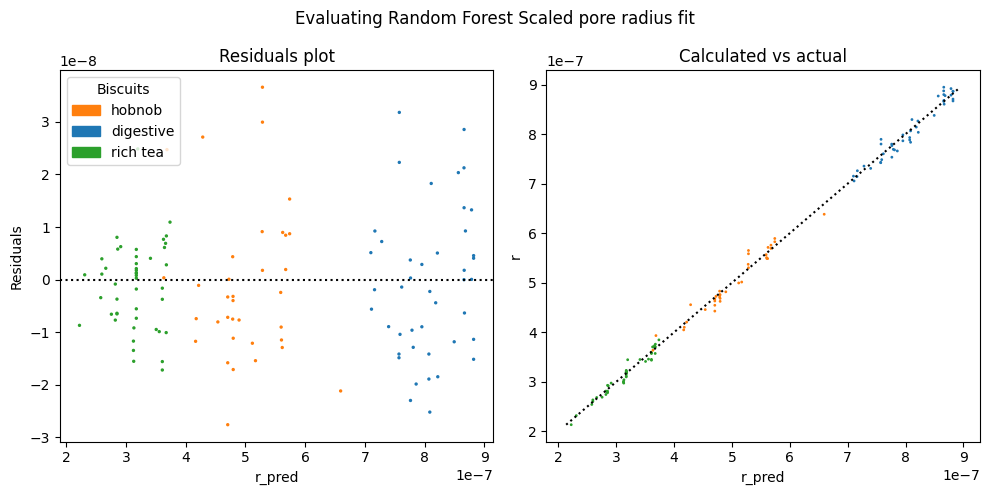

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.061125e-07  -8.651757e-10
Hobnob     4.981081e-07  -1.147028e-09
Rich Tea   3.137429e-07  -1.217306e-09



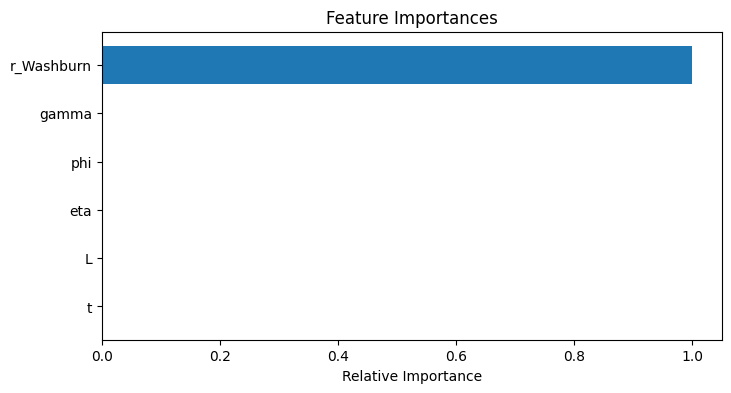

############# Evaluation metrics ###############
model: Linear Scaled
Test size: 124
Correlation coefficient: 0.9986813672619798
Mean Squared Error: 1.2547307751321387e-16
R^2 Score: 0.997325711963
Mean absolute error: 8.109371109194433e-09
Root mean squared error: 1.1201476577363088e-08
Relative absolute error: 0.041864772511613184
Relative root squared error: 0.051713518899799756 

Cross-validated R^2 scores: [0.99674973 0.99761036 0.99742197]
Average cross-validated R^2 score: 0.9972606838388506


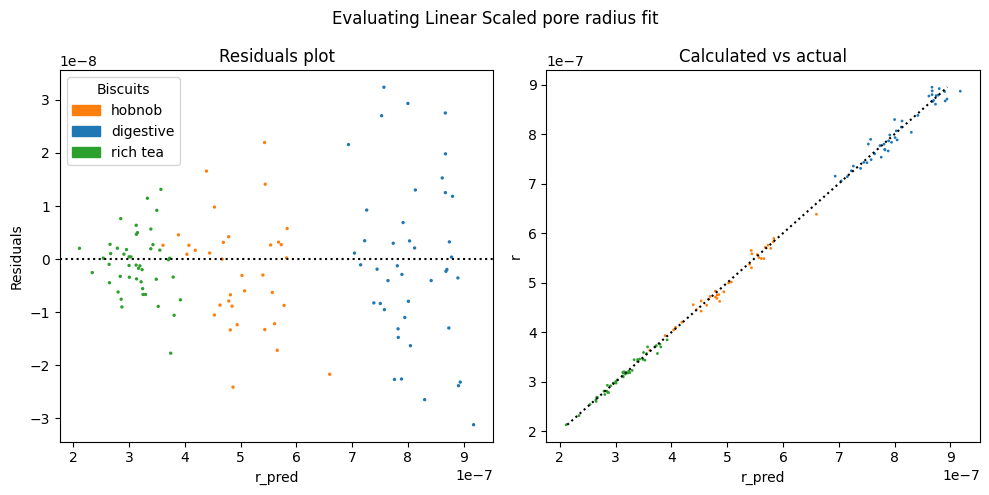

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.061125e-07  -7.462379e-10
Hobnob     4.981081e-07  -2.458589e-09
Rich Tea   3.137429e-07  -9.246877e-10

############# Evaluation metrics ###############
model: Kernel
Test size: 124
Correlation coefficient: 0.9981648239432558
Mean Squared Error: 1.7219555647221426e-16
R^2 Score: 0.9963298858542009
Mean absolute error: 9.240934011318207e-09
Root mean squared error: 1.312233045126567e-08
Relative absolute error: 0.04770648610963577
Relative root squared error: 0.060581467015904174 

Cross-validated R^2 scores: [0.99333027 0.99599025 0.99574459]
Average cross-validated R^2 score: 0.9950217049564588


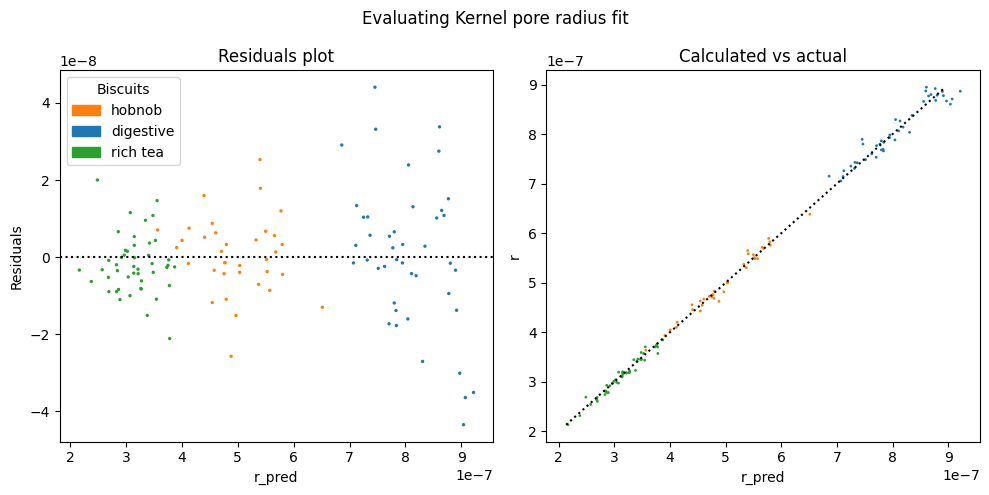

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.061125e-07   4.781119e-10
Hobnob     4.981081e-07   5.616095e-10
Rich Tea   3.137429e-07  -1.906861e-09

############# Evaluation metrics ###############
model: Kernel
Test size: 124
Correlation coefficient: 0.9986864386687017
Mean Squared Error: 1.233550767753445e-16
R^2 Score: 0.997370854268807
Mean absolute error: 8.182629648779182e-09
Root mean squared error: 1.1106533067314233e-08
Relative absolute error: 0.04224297102453748
Relative root squared error: 0.05127519606196541 

Cross-validated R^2 scores: [0.99681506 0.99726043 0.99721851]
Average cross-validated R^2 score: 0.99709799957234


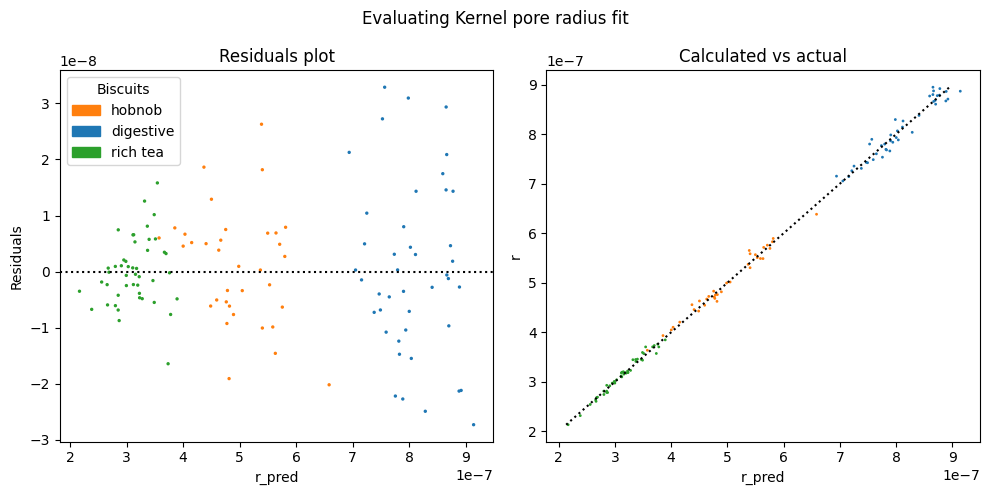

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.061125e-07   2.106351e-10
Hobnob     4.981081e-07   8.499743e-10
Rich Tea   3.137429e-07  -4.299699e-11



In [20]:
# Evaluating the most promising models

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_washburn_train, X_washburn_test, y_washburn_train, y_washburn_test = train_test_split(X_with_Washburn, y, test_size=0.25, random_state=42)
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_pore_rad, y, test_size=0.25, random_state=42)

# RF with Scaled data and Washburn

rf_pipeline_scaled.fit(X_washburn_train, y_washburn_train)

evaluate_pipeline(rf_pipeline_scaled, "Random Forest Scaled", X_washburn_train, y_washburn_train, X_washburn_test, y_washburn_test, microscopy_pruned)

# Linear scaled with Washburn

linear_pipeline.fit(X_washburn_train, y_washburn_train)

evaluate_pipeline(linear_pipeline, "Linear Scaled", X_washburn_train, y_washburn_train, X_washburn_test, y_washburn_test, microscopy_pruned)

# KRR with Washburn

krr_pipeline_poly.fit(X_washburn_train, y_washburn_train)

evaluate_pipeline(krr_pipeline_poly, "Kernel", X_washburn_train, y_washburn_train, X_washburn_test, y_washburn_test, microscopy_pruned)
            
krr_pipeline_poly.fit(X_r_train, y_r_train)

evaluate_pipeline(krr_pipeline_poly, "Kernel", X_r_train, y_r_train, X_r_test, y_r_test, microscopy_pruned)

The plots confirm that the models are over-reliant on the Washburn pore radius. 

The poly kernel will be used with just the pore radius, as a correction. This is an extremely quick fit and prediction, and kernel ridge regression is reliable even when trained on low number of datapoints. 

New variables can be created based on the washburn model, to see if we can equalise the contribution from seperate features in the random forest and linear models 

############# Evaluation metrics ###############
model: Random Forest Scaled
Test size: 99
Correlation coefficient: 0.9604924216596498
Mean Squared Error: 4.3531124477051884e-15
R^2 Score: 0.9111573219540123
Mean absolute error: 4.6640806546545016e-08
Root mean squared error: 6.597812097737543e-08
Relative absolute error: 0.23181218532314238
Relative root squared error: 0.29806488898558264 

Cross-validated R^2 scores: [0.88171428 0.8691355  0.91184707]
Average cross-validated R^2 score: 0.8875656160110963


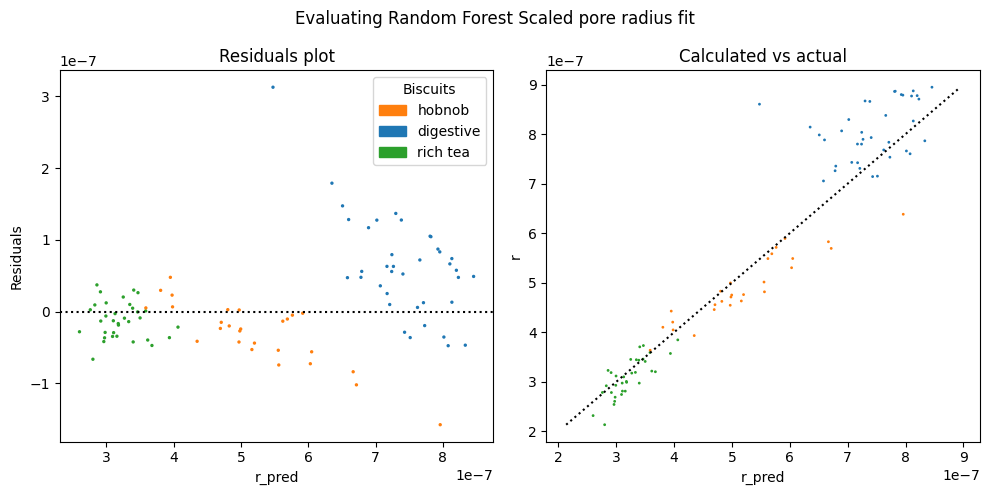

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.054846e-07   6.249089e-08
Hobnob     4.903991e-07  -2.989754e-08
Rich Tea   3.090234e-07  -1.210769e-08



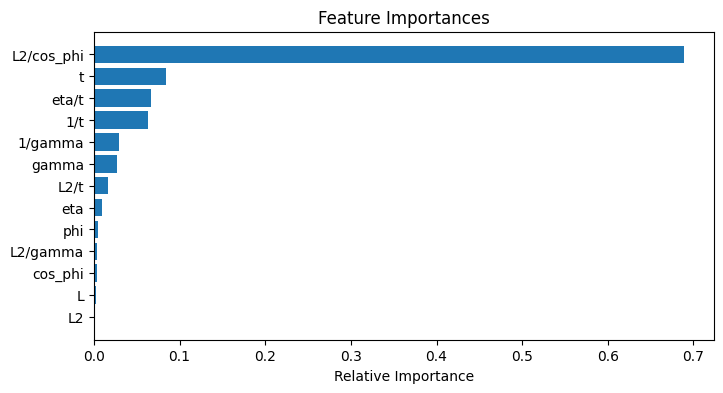

############# Evaluation metrics ###############
model: Linear Scaled
Test size: 99
Correlation coefficient: 0.9682472581585717
Mean Squared Error: 3.388301136740019e-15
R^2 Score: 0.930848157351658
Mean absolute error: 4.2662630676663504e-08
Root mean squared error: 5.8209115581152914e-08
Relative absolute error: 0.21204002205498082
Relative root squared error: 0.2629673794377202 

Cross-validated R^2 scores: [0.94514303 0.90511713 0.92142571]
Average cross-validated R^2 score: 0.9238952874271399


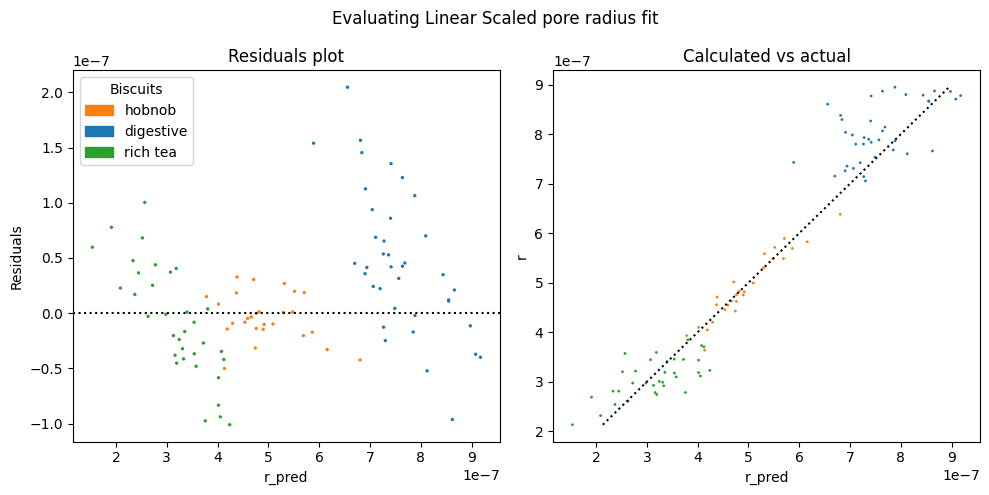

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.054846e-07   4.601614e-08
Hobnob     4.903991e-07  -4.021776e-09
Rich Tea   3.090234e-07  -7.930359e-09

############# Evaluation metrics ###############
model: Kernel
Test size: 99
Correlation coefficient: 0.996455626313977
Mean Squared Error: 4.0222509646596717e-16
R^2 Score: 0.9917909874425181
Mean absolute error: 1.3902934967495701e-08
Root mean squared error: 2.0055550265848285e-08
Relative absolute error: 0.06909978569955602
Relative root squared error: 0.0906036012390336 

Cross-validated R^2 scores: [0.9905167  0.98732356 0.991575  ]
Average cross-validated R^2 score: 0.9898050866301068


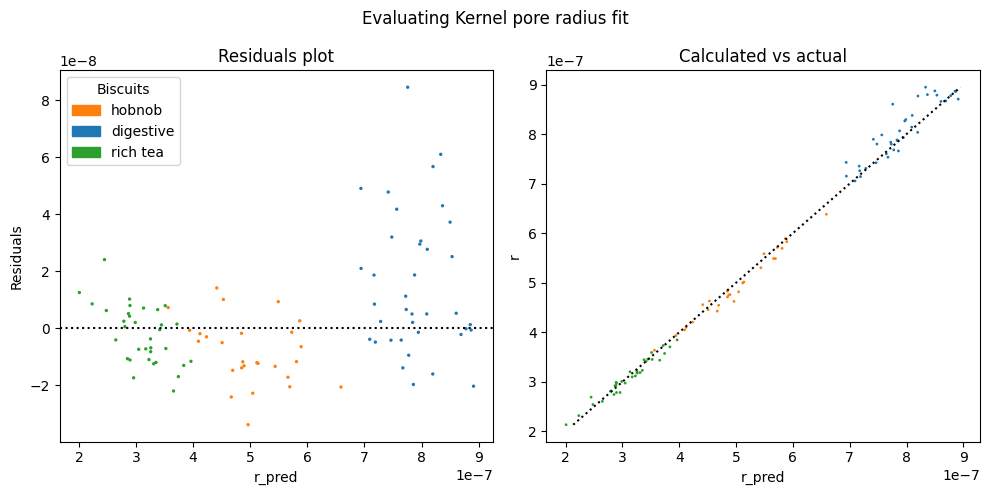

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.054846e-07   1.502806e-08
Hobnob     4.903991e-07  -8.301792e-09
Rich Tea   3.090234e-07  -2.224498e-09



In [21]:
def create_new_variables(df):
    df_new_vars = df.copy()
    df_new_vars['L2'] = df_new_vars['L'] * df_new_vars['L']
    df_new_vars['eta/t'] = df_new_vars['eta'] / df_new_vars['t']
    df_new_vars['1/t'] = 1/df_new_vars['t']
    df_new_vars['cos_phi'] = 1/2*np.cos(df_new_vars['phi'])
    df_new_vars['1/gamma'] = 1/df_new_vars['gamma']
    df_new_vars['L2/cos_phi'] = df_new_vars["L2"] / np.cos(df_new_vars["phi"])
    df_new_vars['L2/t'] = df_new_vars["L2"] / df_new_vars["t"]
    df_new_vars['L2/gamma'] = df_new_vars["L2"] / df_new_vars["gamma"]
    df_new_vars['L2/t'] = df_new_vars["L2"] / df_new_vars["t"]
    return df_new_vars

# Train optimal model on new variables
df_new_vars = create_new_variables(microscopy_pruned)

# Split the data into training and testing sets
X = df_new_vars[['gamma', 'L', 't', 'phi', 'eta', 'L2', 'eta/t', 'cos_phi', '1/gamma', 'L2/cos_phi', 'L2/t', '1/t', 'L2/gamma']]
y = df_new_vars['r']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_pipeline_scaled.fit(X_train, y_train)

evaluate_pipeline(rf_pipeline_scaled, "Random Forest Scaled", X_train, y_train, X_test, y_test, df_new_vars)

linear_pipeline_scaled.fit(X_train, y_train)

evaluate_pipeline(linear_pipeline_scaled, "Linear Scaled", X_train, y_train, X_test, y_test, df_new_vars)

krr_pipeline_poly.fit(X_train, y_train)

evaluate_pipeline(krr_pipeline_poly, "Kernel", X_train, y_train, X_test, y_test, df_new_vars)

The Kernel poly pipeline performs the best on the new features, model optimization will be attempted through hyperparameter tuning and feature selection.

Best hyperparameters: {'alpha': 0.1, 'degree': 5, 'gamma': 0.5}
############# Evaluation metrics ###############
model: Kernel Ridge Regression
Test size: 99
Correlation coefficient: 0.9989493526987696
Mean Squared Error: 9.734668363942352e-17
R^2 Score: 0.9978846280455546
Mean absolute error: 7.418363502910957e-09
Root mean squared error: 9.866442298996306e-09
Relative absolute error: 0.03949085579244698
Relative root squared error: 0.04599317291126383 

Cross-validated R^2 scores: [0.99664301 0.99767971 0.99736619]
Average cross-validated R^2 score: 0.9972296340546102


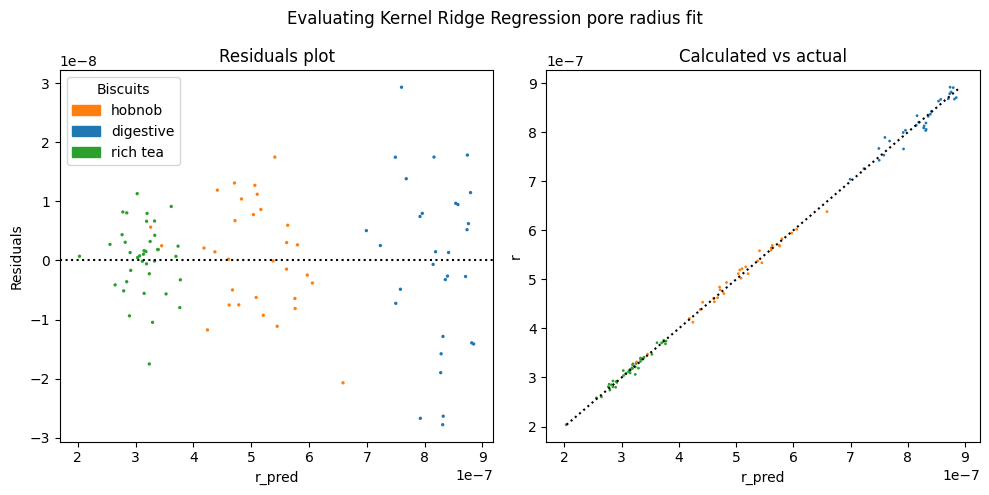

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.182433e-07  -4.741470e-10
Hobnob     5.058430e-07   7.040437e-10
Rich Tea   3.139093e-07   3.269148e-10



In [28]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

features = ['gamma', 'L', 't', 'phi', 'eta', 'L2', 'eta/t', 'cos_phi', '1/gamma', 'L2/cos_phi', 'L2/t', '1/t', 'L2/gamma']

features = ['r_Washburn']

# Define variables
X = microscopy_pruned[features]
y = df_new_vars['r']

# kernel param grid 
param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5],
    'gamma': [0.1, 0.5, 1, 2, 5],
    'degree': [2, 3, 4, 5]
}

scaler = StandardScaler()
stdX = pd.DataFrame(scaler.fit_transform(X), index=X.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=0)

# Define the model
krr = KernelRidge(kernel='poly')

# Define the steps of the pipeline
steps = [
    ('scaler', StandardScaler()),
    ('grid_search', GridSearchCV(KernelRidge(kernel='poly'), param_grid, cv=3, scoring='r2'))
]

# Create the pipeline
opt_krr_pipeline = Pipeline(steps)

# Fit the pipeline
opt_krr_pipeline.fit(X_train, y_train)

# Get the best hyperparameters
best_params = opt_krr_pipeline.named_steps['grid_search'].best_params_
print("Best hyperparameters:", best_params)

# Predict the radius for the test data
y_pred = opt_krr_pipeline.predict(X_test)

# Evaluate the pipeline
evaluate_pipeline(opt_krr_pipeline, "Kernel Ridge Regression", X_train, y_train, X_test, y_test, df_new_vars)


Grid search CV was used for the choice of hyperparameters, since kernel ridge regression is not a computationally intense algorithm it is appropriate.

An improvement of both the $R^2$ and residuals is seen after tuning as well as improved cross validation scores. 

The features set will now be selectively pruned, removing features that do not contribute to the accuracy.

In [29]:
from sklearn.inspection import permutation_importance

opt = opt_krr_pipeline

# List of features
features = ['gamma', 'L', 't', 'phi', 'eta', 'L2', 'eta/t', 'cos_phi', '1/gamma', 'L2/cos_phi', 'L2/t', '1/t', 'L2/gamma']

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Least important feature', 'R2 Score'])

# Initialize the best score and the best model
best_score = -np.inf
best_model = None
best_features = None

# Loop until no features left
while len(features) > 0:
    # Define the new X
    X_new = df_new_vars[features]
    
    # Scale the data
    stdX_new = pd.DataFrame(scaler.fit_transform(X_new), index=X_new.index)
    
    # Split the data into training and testing sets
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(stdX_new, y, test_size=0.2, random_state=0)
    
    # Fit the model with the best hyperparameters
    krr = KernelRidge(kernel='poly', **best_params)
    krr.fit(X_train_new, y_train_new)
    
    # Predict the radius for the test data
    y_pred_new = krr.predict(X_test_new)
    
    # Calculate the R2 score
    r2 = r2_score(y_test_new, y_pred_new)
    
    # If the score is better than the current best score, update the best score and the best model
    if r2 > best_score:
        best_score = r2
        best_model = krr
        best_features = features.copy()  # Make a copy of the current features
    
    # Compute the permutation importance
    result = permutation_importance(krr, X_test_new, y_test_new, n_repeats=10, random_state=0)

    # Get the importances
    importances = result.importances_mean

    # Get the index of the least important feature
    least_important_index = np.argmin(importances)

    # Get the least important feature
    least_important_feature = features[least_important_index]

    # Append the results to the DataFrame
    results.loc[len(features)] = [least_important_feature, r2]

    # Remove the least important feature from the list
    features.remove(least_important_feature)

# Print the best model
#print("Best model:", best_model)
print("Best model features:", best_features)
#print("Best model hyperparameters:", best_model.get_params())

results

Best model features: ['gamma', 'L', '1/gamma', 'L2/gamma']


,Least important feature,R2 Score
13,1/t,-13.820509
12,eta,-0.439488
11,L2/t,-25.335938
10,cos_phi,-45.295661
9,t,-43.966522
8,L2,-18.130292
7,eta/t,-0.012150
6,phi,-0.854838
5,L2/cos_phi,-11.634375
4,L,0.120383


The most accurate model only removes one feature, this feature set will be used with the hyperparameter tuning

############# Evaluation metrics ###############
model: Kernel Ridge Regression
Test size: 124
Correlation coefficient: 0.38496024112876853
Mean Squared Error: 3.992357569667618e-14
R^2 Score: 0.096102175518751
Mean absolute error: 1.6718709916901745e-07
Root mean squared error: 1.9980884789387126e-07
Relative absolute error: 0.9178513614094783
Relative root squared error: 0.9507354124472533 

Cross-validated R^2 scores: [ -0.06470648 -15.64987267  -1.40705749]
Average cross-validated R^2 score: -5.7072122125633085


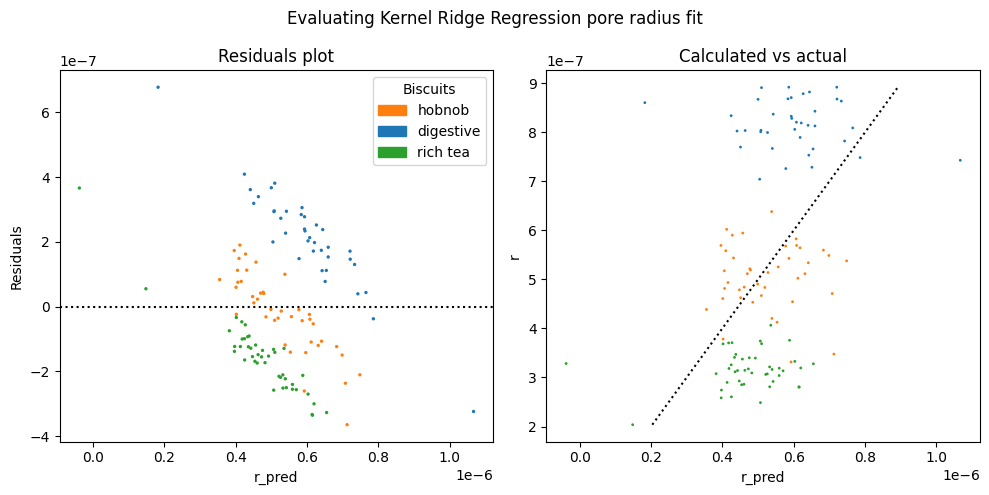

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.152203e-07   2.153275e-07
Hobnob     5.057042e-07  -1.941227e-08
Rich Tea   3.157063e-07  -1.572347e-07



In [30]:
# Fit krr with best features
X = df_new_vars[best_features]
y = df_new_vars['r']

stdX = pd.DataFrame(scaler.fit_transform(X), index=X.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.25, random_state=0)

# Fit the model with the best hyperparameters
krr = KernelRidge(kernel='poly', **best_params)
krr.fit(X_train, y_train)

# Predict the radius for the test data
y_pred = krr.predict(X_test)

# Evaluate the pipeline
evaluate_pipeline(krr, "Kernel Ridge Regression", X_train, y_train, X_test, y_test, df_new_vars)


############# Evaluation metrics ###############
model: Kernel Ridge Regression
Test size: 124
Correlation coefficient: 0.998771385899245
Mean Squared Error: 1.0921900846126194e-16
R^2 Score: 0.9975272048553419
Mean absolute error: 7.904639522846579e-09
Root mean squared error: 1.0450789848679474e-08
Relative absolute error: 0.04339619613927979
Relative root squared error: 0.04972720728794419 

Cross-validated R^2 scores: [0.99713157 0.99760571 0.99752684]
Average cross-validated R^2 score: 0.9974213723622126


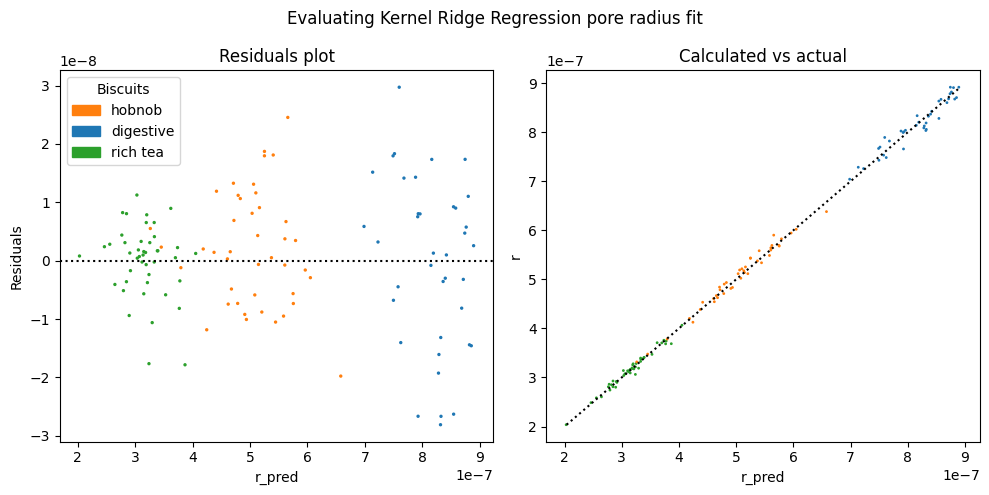

                  Avg r  Avg Residuals
biscuit                               
Digestive  8.152203e-07  -2.000150e-10
Hobnob     5.057042e-07   1.945346e-09
Rich Tea   3.157063e-07  -7.707745e-11



In [31]:
# Fit krr with best parameters on r_Washburn 
X = df_new_vars[['r_Washburn']]
y = df_new_vars['r']

stdX = pd.DataFrame(scaler.fit_transform(X), index=X.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.25, random_state=0)

# Fit the model with the best hyperparameters
krr = KernelRidge(kernel='poly', **best_params)
krr.fit(X_train, y_train)

# Predict the radius for the test data
y_pred = krr.predict(X_test)

# Evaluate the pipeline
evaluate_pipeline(krr, "Kernel Ridge Regression", X_train, y_train, X_test, y_test, df_new_vars)


Although the model has been tuned and features have been selected by importance, the model using generated features fails to outperform KRR with the washburn pore radius, therefore the previous model will be used to calculate the pore radius, and subsequently classify the biscuits

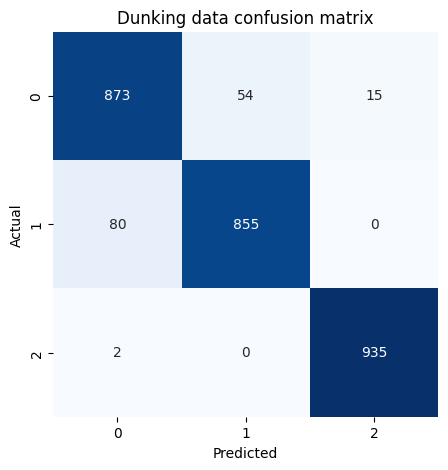

,precision,recall,f1-score,support
0,0.914136,0.926752,0.920401,942.00000
1,0.940594,0.914439,0.927332,935.00000
2,0.984211,0.997866,0.990991,937.00000
accuracy,0.946340,0.946340,0.946340,0.94634
macro avg,0.946314,0.946352,0.946241,2814.00000
weighted avg,0.946260,0.946340,0.946209,2814.00000


In [32]:
# ML r calculation 

# Calculate r_washburn
dunking_data["r_Washburn"] = dunking_data.apply(calc_r_washburn, axis=1)

# Define variables
X = dunking_data[['r_Washburn']]
stdX = scaler.fit_transform(X)

# Predict the radius for the data
dunking_data["r_pred"] = opt_krr_pipeline.predict(stdX)

# Classification based on ML r

X = dunking_data[['r_pred','L','eta','gamma','phi','t']]

scaler = StandardScaler()
stdX = scaler.fit_transform(X)

y_pred = clf_rf.predict(stdX)

# Confusion matrix
conf_mat = confusion_matrix(dunking_data["biscuit_encoded"], y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Dunking data confusion matrix')
plt.show()

# Classification report
report_dict = classification_report(dunking_data["biscuit_encoded"], y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

report_df




This gives us a reliable machine learning method for predicting the biscuit type from the data available in dunking_data, using KRR as a correction to the Washburn equation. The results are comparable to the figures seen on the test sets and only differ by 0.013 in accuracy in comparison to the classifier trained on real microscopy data. This means that the biscuits type can be predicted with 0.055 % accuracy without the need for empirical microscopy measurements, saving lab-time and human resources. 

### Investigating the time dependent nature of capillary flow 

The time resolved datasets will now be explored, first to identify the biscuit type of each dataset and then the rate of flow will be investigated. 

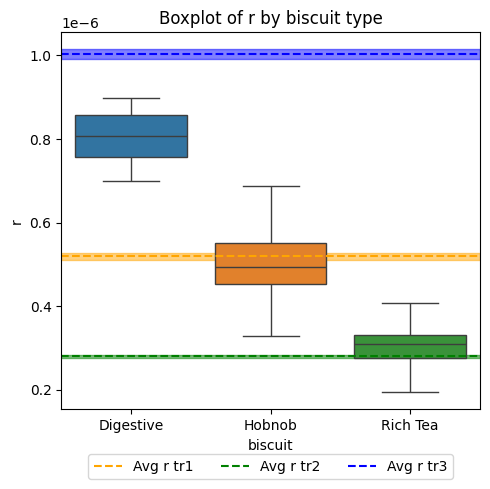

In [27]:
def draw_box_and_line(data, color, label):
    avg_r = data.mean()
    lower_q = data.quantile(0.25)
    upper_q = data.quantile(0.75)
    
    plt.axhline(avg_r, color=color, linestyle='dashed', label=f'Avg r {label}')
    plt.gca().add_patch(plt.Rectangle((-0.5, lower_q), 3, upper_q-lower_q, fill=True, color=color, alpha=0.5))

# Calculate r_Washburn for each dataset 
tr1_data['r_Washburn'] = tr1_data.apply(calc_r_washburn, axis=1)
tr2_data['r_Washburn'] = tr2_data.apply(calc_r_washburn, axis=1)
tr3_data['r_Washburn'] = tr3_data.apply(calc_r_washburn, axis=1)

# Store the data for each biscuit type in a dictionary
biscuit_data = {
    'tr1': tr1_data['r_Washburn'],
    'tr2': tr2_data['r_Washburn'],
    'tr3': tr3_data['r_Washburn']
}

# Define the colors for each biscuit type
colors = {
    'tr1': 'orange',
    'tr2': 'green',
    'tr3': 'blue'
}

# Plot results with against box plots or r for df_no_outliers
plt.figure(figsize=(5, 5))
sns.boxplot(data=microscopy_pruned, x='biscuit', y='r', hue='biscuit')
plt.title('Boxplot of r by biscuit type')

# Draw the box and the average line for each biscuit type
for biscuit, data in biscuit_data.items():
    draw_box_and_line(data, colors[biscuit], biscuit)

# Add legend and move it up
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.tight_layout()
plt.show()

By average r values, the biscuit type can be determined for each time resolved dataset

Attributing tr datasets: 
* tr1 - Hobnob
* tr2 - Rich Tea
* tr3 - Digestive

The time data from the dunking_data will be averaged to get the times 0-30 s for each biscuit type, Then the rate of flow will be determined for each by fitting a line of best fit.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Helper functions for:
# Plotting line across the boxplot
# Removing outliers
# Combining tr data with dunking data
# Plotting the data

def draw_box_and_line(data, color, label):
    avg_r = data.mean()
    lower_q = data.quantile(0.25)
    upper_q = data.quantile(0.75)
    
    plt.axhline(avg_r, color=color, linestyle='dashed', label=f'Avg r {label}')
    plt.gca().add_patch(plt.Rectangle((-0.5, lower_q), 3, upper_q-lower_q, fill=True, color=color, alpha=0.5))

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df_out

def process_data(df, biscuit_type):
    dunking_data_biscuit = dunking_data[dunking_data['biscuit'] == biscuit_type]
    dunking_data_biscuit = remove_outliers(dunking_data_biscuit, "L")
    df_full = pd.concat([dunking_data_biscuit, df])
    df_full['t'] = df_full['t'].round()
    df_full = df_full.groupby('t')[['L', 'dL']].mean().reset_index()
    return df_full

def plot_data(df, color, label):
    plt.errorbar(df['t'], df['L'], yerr=df['dL'], fmt='o', color=color, label=label)

def fit_and_plot(df, color, label):
    coeffs = np.polyfit(df['t'], df['L'], degree)
    poly = np.poly1d(coeffs)
    plt.errorbar(df['t'], df['L'], yerr=df['dL'], fmt='o', color=color, label=label)
    plt.plot(df['t'], poly(df['t']), color=color)

# Calculate r_Washburn for each dataset 
for df in [tr1_data, tr2_data, tr3_data]:
    df['r_Washburn'] = df.apply(calc_r_washburn, axis=1)

# Store the data for each biscuit type in a dictionary
biscuit_data = {
    'tr1': tr1_data['r_Washburn'],
    'tr2': tr2_data['r_Washburn'],
    'tr3': tr3_data['r_Washburn']
}

# Define the colors for each biscuit type
colors = {
    'tr1': 'orange',
    'tr2': 'green',
    'tr3': 'blue'
}

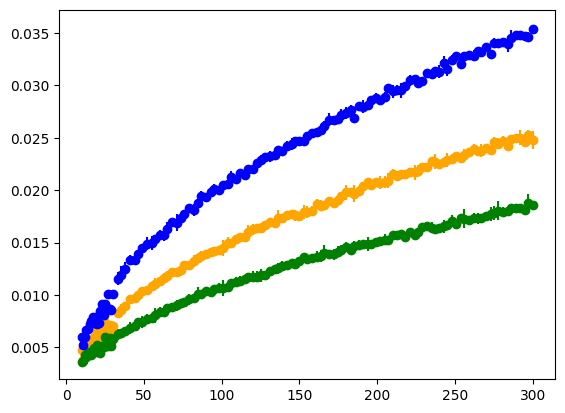

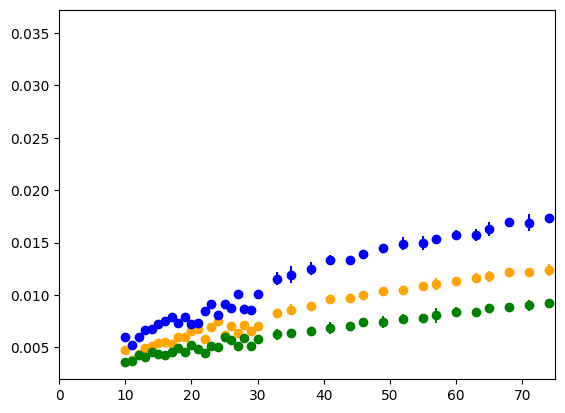

In [32]:
# Process the data for each biscuit type
tr1_full = process_data(tr1_data, 'Hobnob')
tr2_full = process_data(tr2_data, 'Rich Tea')
tr3_full = process_data(tr3_data, 'Digestive')

# Plot the data
for df, color, label in zip([tr1_full, tr2_full, tr3_full], ['orange', 'green', 'blue'], ['hobnob', 'rich tea', 'digestive']):
    plot_data(df, color, label)

plt.show()

# Zoomed plot 
for df, color, label in zip([tr1_full, tr2_full, tr3_full], ['orange', 'green', 'blue'], ['hobnob', 'rich tea', 'digestive']):
    plot_data(df, color, label)

plt.xlim(0, 75)
plt.show()

It seems that there is a period of rapid absorption, where the rate of uptake is faster, which then evens out. A polynomial fit will be attempted to find the rate of capillary flow

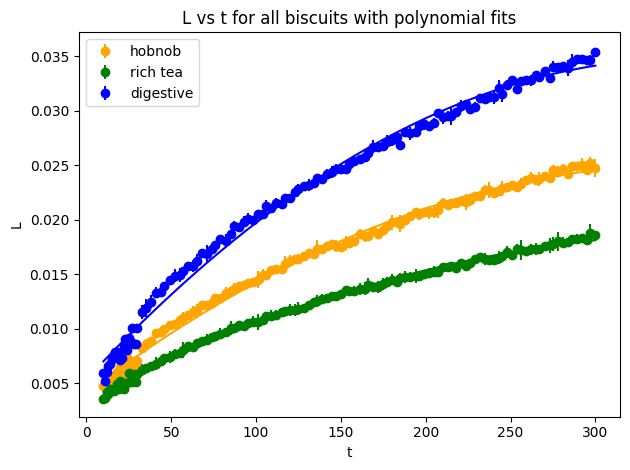

In [33]:
# Fit a polynomial of degree 2 to the data
degree = 2

# Fit and plot for each biscuit type
for df, color, label in zip([tr1_full, tr2_full, tr3_full], ['orange', 'green', 'blue'], ['hobnob', 'rich tea', 'digestive']):
    fit_and_plot(df, color, label)

plt.title('L vs t for all biscuits with polynomial fits')
plt.xlabel('t')
plt.ylabel('L')
plt.legend()

plt.tight_layout()
plt.show()


The polynomial fit is not ideal for Hobnob and Digestive, a hybrid linear / polynomial approach will be tried, as well as a plot of $L^2$ vs $t$

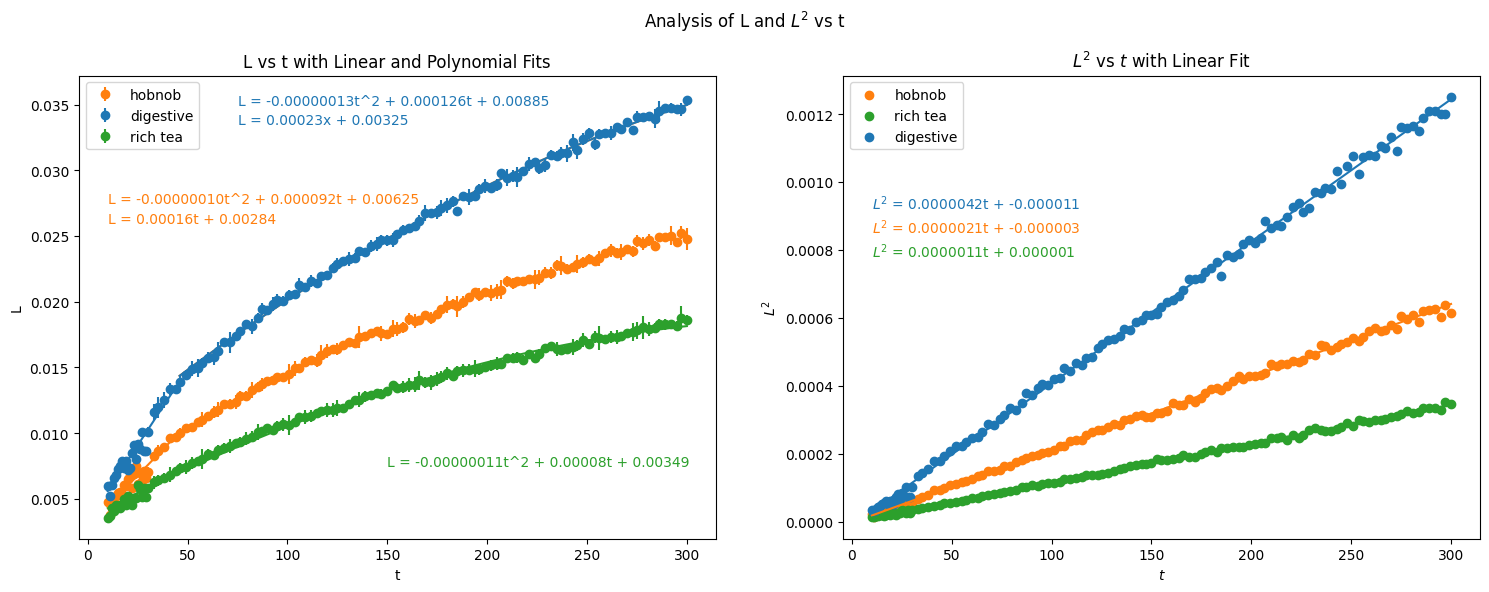

In [36]:
# Identify the 'elbow' point
elbow_point_hobnob = 45  # replace with the actual elbow point
elbow_point_digestive = 45  # replace with the actual elbow point

# Split the data
hobnob_before_elbow = tr1_full[tr1_full['t'] <= elbow_point_hobnob]
hobnob_after_elbow = tr1_full[tr1_full['t'] > elbow_point_hobnob]

digestive_before_elbow = tr3_full[tr3_full['t'] <= elbow_point_digestive]
digestive_after_elbow = tr3_full[tr3_full['t'] > elbow_point_digestive]

# Fit a linear line to each part of the data
model = LinearRegression()

# Hobnob
hobnob_before_elbow = hobnob_before_elbow.copy()
model.fit(hobnob_before_elbow['t'].values.reshape(-1, 1), hobnob_before_elbow['L'])
hobnob_before_elbow.loc[:, 'fit'] = model.predict(hobnob_before_elbow['t'].values.reshape(-1, 1))
poly = np.polyfit(hobnob_after_elbow['t'], hobnob_after_elbow['L'], deg=2)

# Digestive
digestive_before_elbow = digestive_before_elbow.copy()
model.fit(digestive_before_elbow['t'].values.reshape(-1, 1), digestive_before_elbow['L'])
digestive_before_elbow.loc[:, 'fit'] = model.predict(digestive_before_elbow['t'].values.reshape(-1, 1))
poly = np.polyfit(digestive_after_elbow['t'], digestive_after_elbow['L'], deg=2)

# Rich Tea
coeffs_rich_tea = np.polyfit(tr2_full['t'], tr2_full['L'], 2)
poly_rich_tea = np.poly1d(coeffs_rich_tea)
tr2_full['fit'] = poly_rich_tea(tr2_full['t'])

# Combine elbow data for digestive and hobnob
hobnob_after_elbow = hobnob_after_elbow.copy()
digestive_after_elbow = digestive_after_elbow.copy()
hobnob_after_elbow.loc[:, 'fit'] = np.polyval(poly, hobnob_after_elbow['t'])
digestive_after_elbow.loc[:, 'fit'] = np.polyval(poly, digestive_after_elbow['t'])

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: L vs t with linear and polynomial fits

# Plot lines and scatter
axs[0].plot(hobnob_before_elbow['t'], hobnob_before_elbow['fit'], color=color_dict['hobnob'])
axs[0].plot(hobnob_after_elbow['t'], hobnob_after_elbow['fit'], color=color_dict['hobnob'])
axs[0].plot(digestive_before_elbow['t'], digestive_before_elbow['fit'], color=color_dict['digestive'])
axs[0].plot(digestive_after_elbow['t'], digestive_after_elbow['fit'], color=color_dict['digestive'])
axs[0].plot(tr2_full['t'], poly_rich_tea(tr2_full['t']), color=color_dict['rich tea'])
axs[0].errorbar(tr1_full['t'], tr1_full['L'], yerr=tr1_full['dL'], fmt='o', color=color_dict['hobnob'], label='hobnob')
axs[0].errorbar(tr3_full['t'], tr3_full['L'], yerr=tr3_full['dL'], fmt='o', color=color_dict['digestive'], label='digestive')
axs[0].errorbar(tr2_full['t'], tr2_full['L'], yerr=tr2_full['dL'], fmt='o', color=color_dict['rich tea'], label='rich tea')

# find coeffs for each fit
coeffs_hobnob_before = np.polyfit(hobnob_before_elbow['t'], hobnob_before_elbow['L'], 1)
coeffs_hobnob_after = np.polyfit(hobnob_after_elbow['t'], hobnob_after_elbow['L'], 2)
coeffs_digestive_before = np.polyfit(digestive_before_elbow['t'], digestive_before_elbow['L'], 1)
coeffs_digestive_after = np.polyfit(digestive_after_elbow['t'], digestive_after_elbow['L'], 2)

# display equations
axs[0].text(10, 0.0260, f'L = {coeffs_hobnob_before[0]:.5f}t + {coeffs_hobnob_before[1]:.5f}', color=color_dict['hobnob'])
axs[0].text(10, 0.0275, f'L = {coeffs_hobnob_after[0]:.8f}t^2 + {coeffs_hobnob_after[1]:.6f}t + {coeffs_hobnob_after[2]:.5f}', color=color_dict['hobnob'])
axs[0].text(75, 0.0335, f'L = {coeffs_digestive_before[0]:.5f}x + {coeffs_digestive_before[1]:.5f}', color=color_dict['digestive'])
axs[0].text(75, 0.035, f'L = {coeffs_digestive_after[0]:.8f}t^2 + {coeffs_digestive_after[1]:.6f}t + {coeffs_digestive_after[2]:.5f}', color=color_dict['digestive'])
axs[0].text(150,0.0075, f'L = {coeffs_rich_tea[0]:.8f}t^2 + {coeffs_rich_tea[1]:.5f}t + {coeffs_rich_tea[2]:.5f}', color=color_dict['rich tea'])

# Configure subplot
axs[0].set_title('L vs t with Linear and Polynomial Fits')
axs[0].set_xlabel('t')
axs[0].set_ylabel('L')
axs[0].legend()

# Second subplot: L^2 vs t with linear fit

# Create L2 column
tr1_full["L2"] = tr1_full["L"]**2
tr2_full["L2"] = tr2_full["L"]**2
tr3_full["L2"] = tr3_full["L"]**2

# Fit for hobnob
coeffs_hobnob = np.polyfit(tr1_full['t'], tr1_full['L2'], 1)
poly_hobnob = np.poly1d(coeffs_hobnob)
tr1_full['fit'] = poly_hobnob(tr1_full['t'])

# Fit for Rich Tea
coeffs_rich_tea = np.polyfit(tr2_full['t'], tr2_full['L2'], 1)
poly_rich_tea = np.poly1d(coeffs_rich_tea)
tr2_full['fit'] = poly_rich_tea(tr2_full['t'])

coeffs_digestive = np.polyfit(tr3_full['t'], tr3_full['L2'], 1)
poly_digestive = np.poly1d(coeffs_digestive)
tr3_full['fit'] = poly_digestive(tr3_full['t'])

axs[1].scatter(tr1_full['t'], tr1_full['L2'], color=color_dict['hobnob'], label='hobnob')
axs[1].scatter(tr2_full['t'], tr2_full['L2'], color=color_dict['rich tea'], label='rich tea')
axs[1].scatter(tr3_full['t'], tr3_full['L2'], color=color_dict['digestive'], label='digestive')
axs[1].plot(tr1_full['t'], tr1_full['fit'], color=color_dict['hobnob'])
axs[1].plot(tr2_full['t'], tr2_full['fit'], color=color_dict['rich tea'])
axs[1].plot(tr3_full['t'], tr3_full['fit'], color=color_dict['digestive'])
# Add coefficients to the plot
coeffs_hobnob = np.polyfit(tr1_full['t'], tr1_full['L2'], 1)
coeffs_rich_tea = np.polyfit(tr2_full['t'], tr2_full['L2'], 1)
coeffs_digestive = np.polyfit(tr3_full['t'], tr3_full['L2'], 1)
axs[1].text(10, 0.00085, f'$L^2$ = {coeffs_hobnob[0]:.7f}t + {coeffs_hobnob[1]:.6f}', color=color_dict['hobnob'])
axs[1].text(10, 0.00078, f'$L^2$ = {coeffs_rich_tea[0]:.7f}t + {coeffs_rich_tea[1]:.6f}', color=color_dict['rich tea'])
axs[1].text(10, 0.00092, f'$L^2$ = {coeffs_digestive[0]:.7f}t + {coeffs_digestive[1]:.6f}', color=color_dict['digestive'])
axs[1].set_title(r'$L^2$ vs $t$ with Linear Fit')
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$L^2$')
axs[1].legend()

plt.suptitle('Analysis of L and $L^2$ vs t')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

From the linear fit of $L^2 \hspace{0.1cm} vs \hspace{0.1cm} t$, the rate of capillary flow in $m^2s^{-1}$ can be determined according to the Washburn equation. 

Similarly, the relative difference between the initial rates can be quantified using the linear fit of initial $L \hspace{0.1cm} vs \hspace{0.1cm} t$ data.

% results 
% initial results 

/tmp/ipykernel_97648/3604086426.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


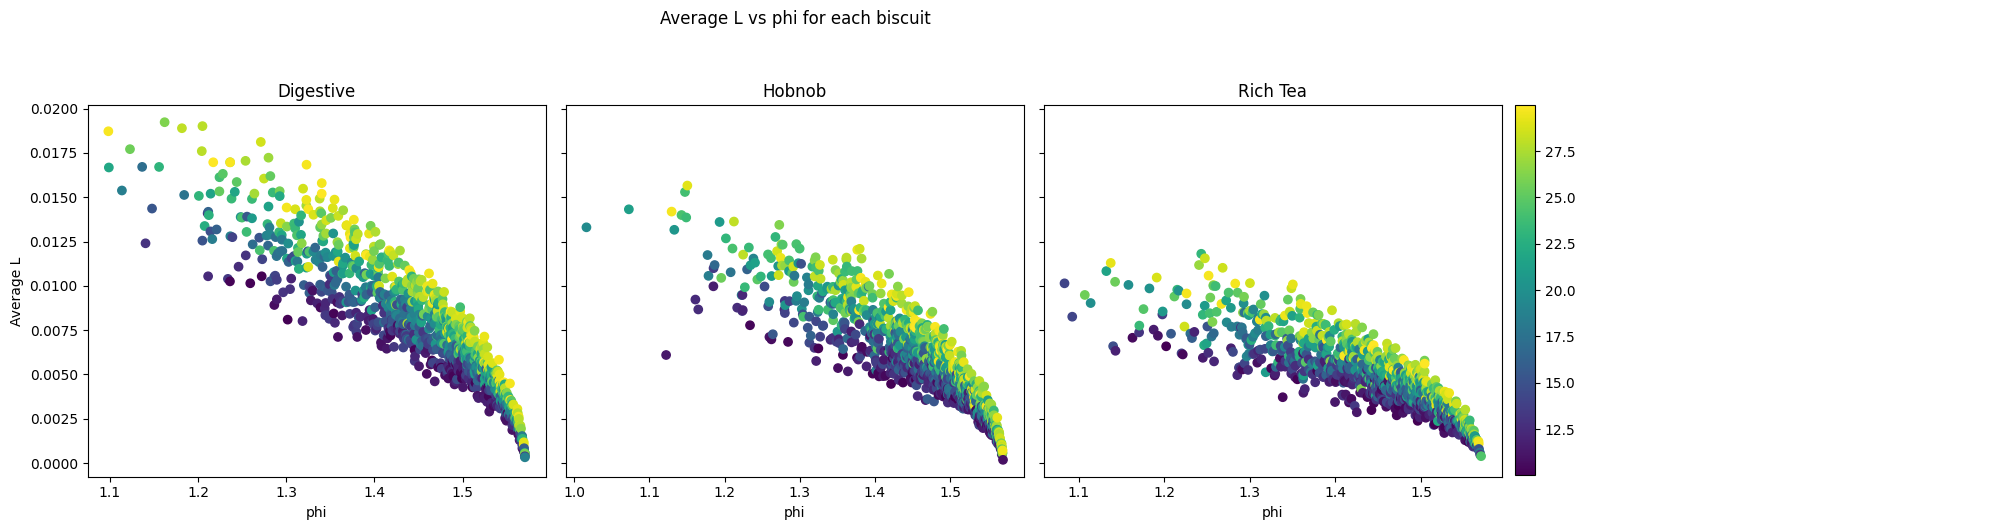

In [37]:
import matplotlib.cm as cm

# Group by 'phi', 't' and 'biscuit' and calculate the mean of 'L'
dunking_data_grouped = dunking_data.groupby(['biscuit', 'phi', 't'])['L'].mean().reset_index()

# Create a color map
cmap = plt.colormaps['viridis']

# Create subplots with an additional subplot for the colorbar
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Make the last axes (for the colorbar) invisible
axs[-1].axis('off')

# Plot each biscuit type separately
for i, biscuit in enumerate(dunking_data_grouped['biscuit'].unique()):
    sc = axs[i].scatter(dunking_data_grouped[dunking_data_grouped['biscuit'] == biscuit]['phi'], 
                        dunking_data_grouped[dunking_data_grouped['biscuit'] == biscuit]['L'], 
                        c=dunking_data_grouped[dunking_data_grouped['biscuit'] == biscuit]['t'], 
                        cmap=cmap)
    axs[i].set_xlabel('phi')
    axs[i].set_title(f'{biscuit}')

axs[0].set_ylabel('Average L')

# Create a new axes for the colorbar at the left of the subplots
cbar_ax = fig.add_axes([0.76, 0.12, 0.01, 0.74])

# Add colorbar to the new axes
fig.colorbar(sc, cax=cbar_ax)
fig.suptitle('Average L vs phi for each biscuit', x=0.4, y=1.05)

plt.tight_layout()
plt.show()